In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from itertools import product

# EDA

Attributes

- People

  - ID: Customer's unique identifier
  - Year_Birth: Customer's birth year
  - Education: Customer's education level
  - Marital_Status: Customer's marital status
  - Income: Customer's yearly household income
  - Kidhome: Number of children in customer's household
  - Teenhome: Number of teenagers in customer's household
  - Dt_Customer: Date of customer's enrollment with the company
  - Recency: Number of days since customer's last purchase
  - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products

  - MntWines: Amount spent on wine in last 2 years
  - MntFruits: Amount spent on fruits in last 2 years
  - MntMeatProducts: Amount spent on meat in last 2 years
  - MntFishProducts: Amount spent on fish in last 2 years
  - MntSweetProducts: Amount spent on sweets in last 2 years
  - MntGoldProds: Amount spent on gold in last 2 years

- Promotion

  - NumDealsPurchases: Number of purchases made with a discount
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place

  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
df_marketing_campaign = pd.read_csv('datasets/marketing_campaign.csv', sep='\t')

In [3]:
if(pd.options.display.max_columns < df_marketing_campaign.shape[1]):
  pd.options.display.max_columns = df_marketing_campaign.shape[1]

In [4]:
df_marketing_campaign.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
df_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df_marketing_campaign.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

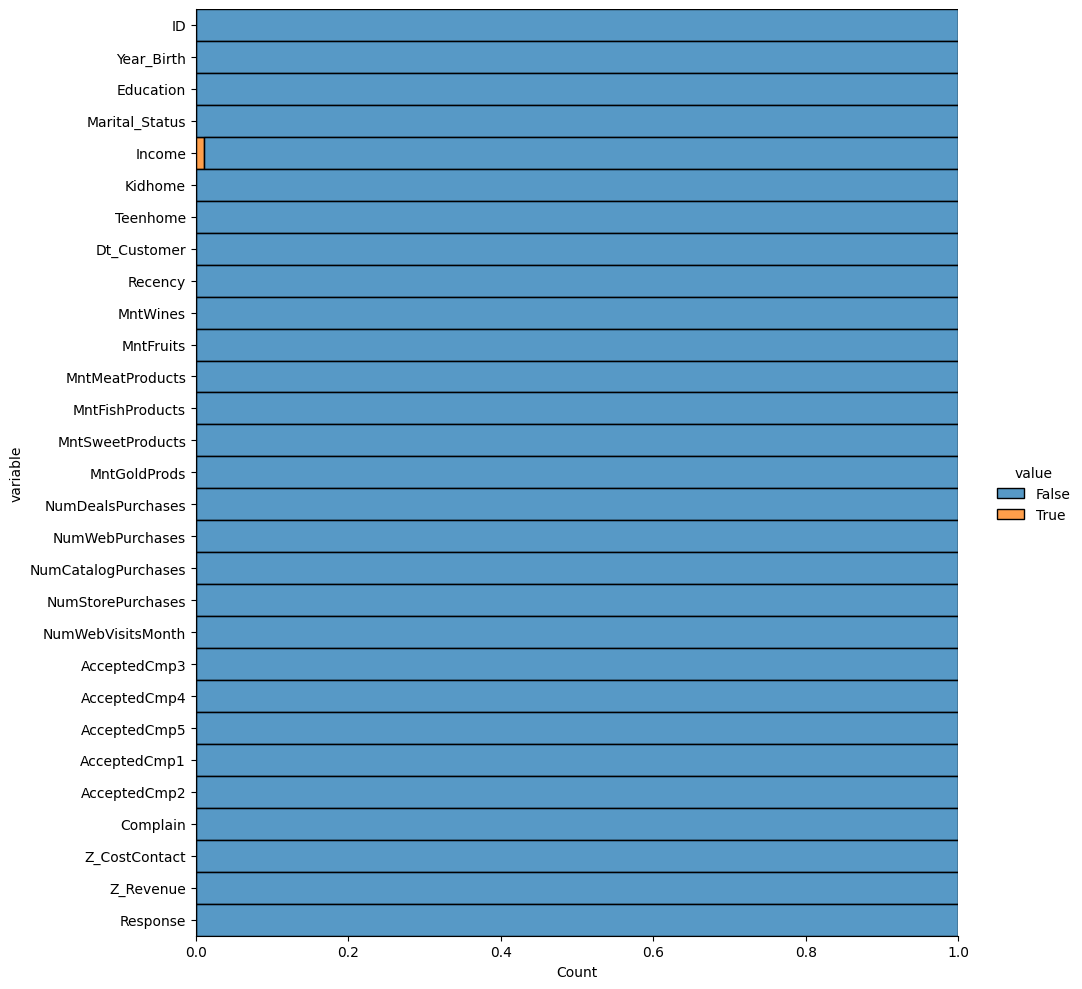

In [7]:
df_marketing_campaign.isna().melt().pipe(
    lambda df:(
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            height=10
        )
    )
)
plt.show()

In [8]:
pd.options.display.max_columns = df_marketing_campaign.shape[1]
df_marketing_campaign.describe()


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

## Numeric columns

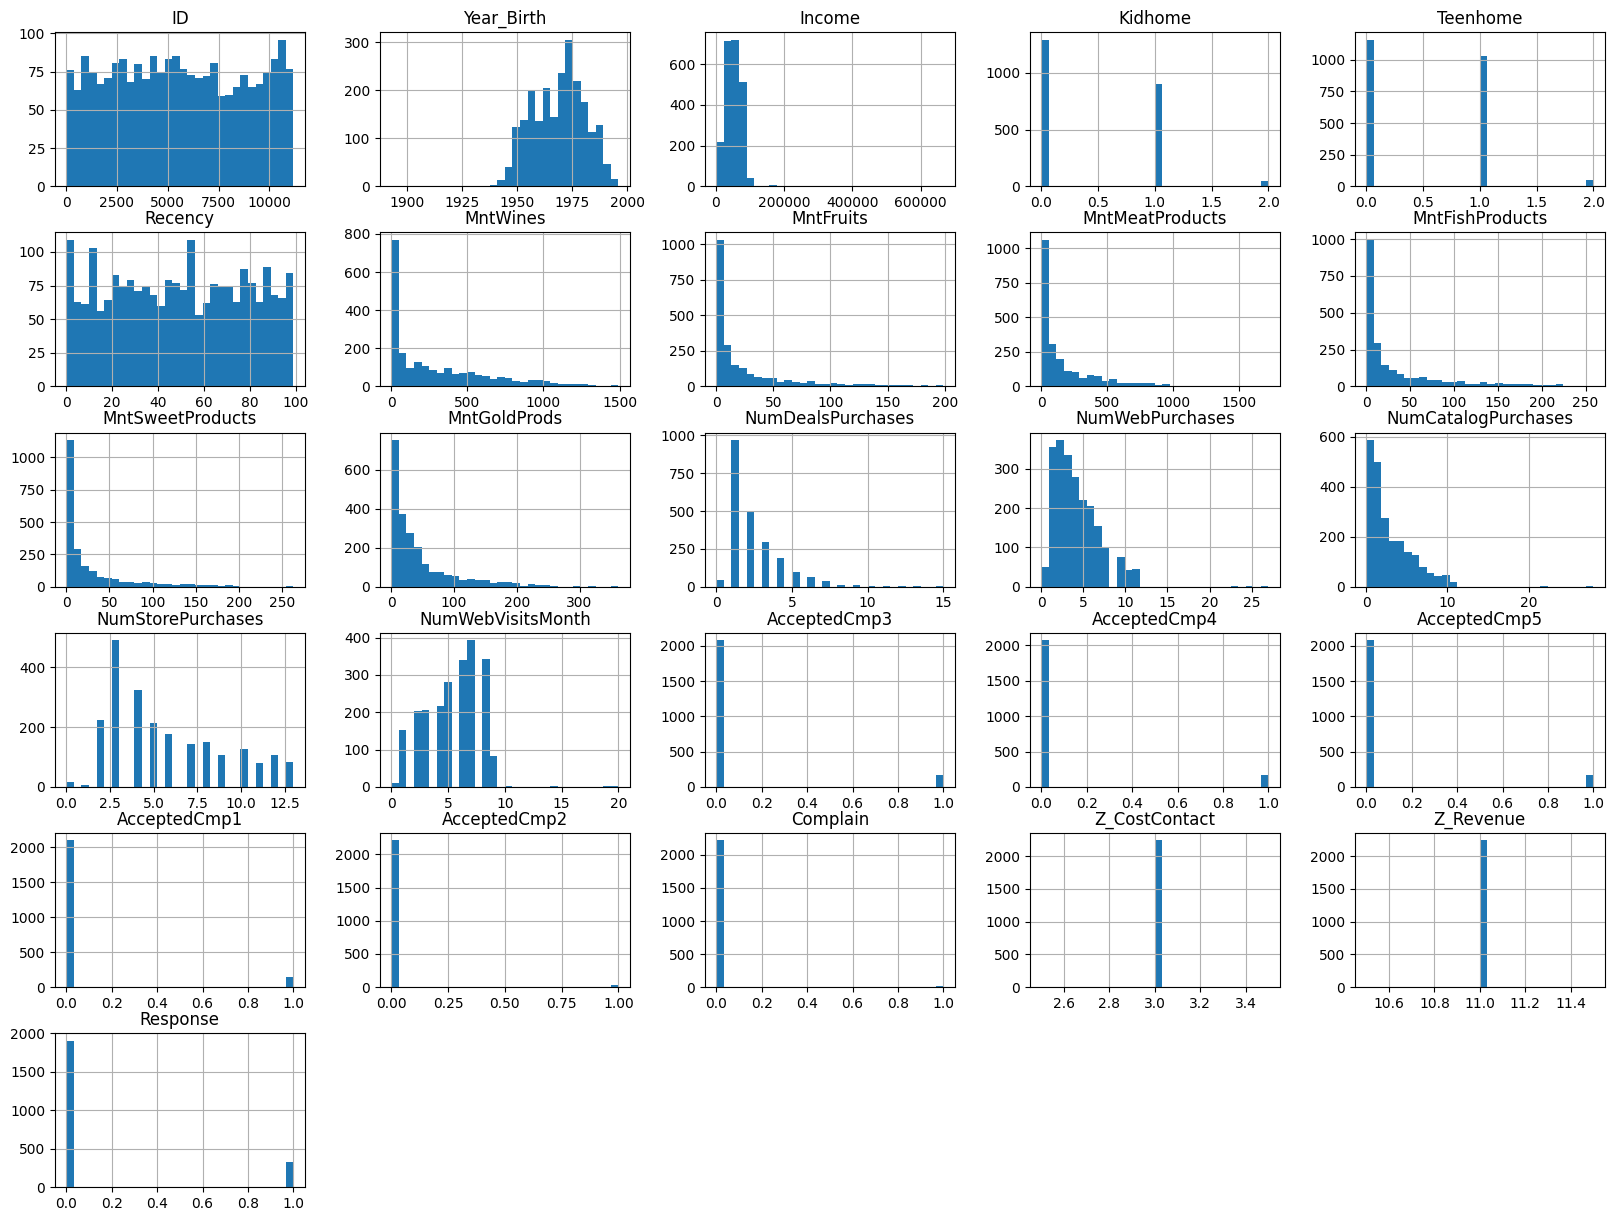

In [9]:
df_marketing_campaign.hist(bins=30, figsize=(20, 15))
plt.show()

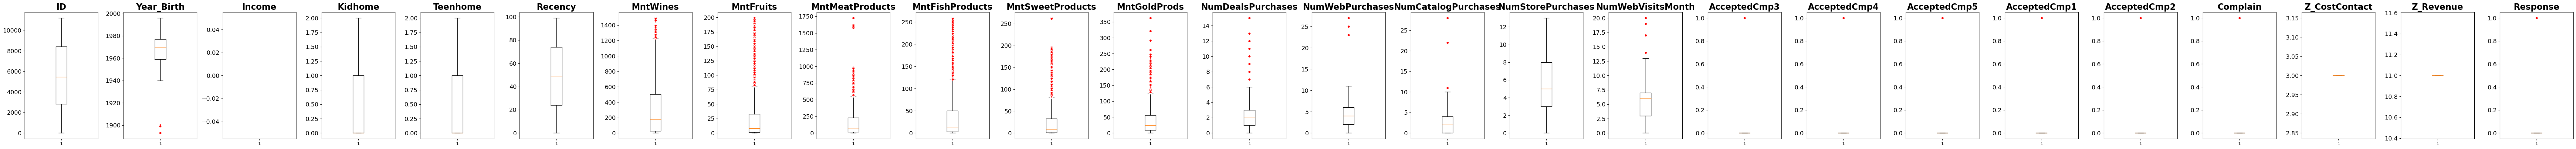

In [10]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
df_marketing_campaign_num = df_marketing_campaign.select_dtypes(include='number')
fig, axs = plt.subplots(1, len(df_marketing_campaign_num.columns), figsize=(85,5))
print(axs.flat)
for i, ax in enumerate(axs.flat):
  ax.boxplot(df_marketing_campaign_num.iloc[:,i], flierprops=red_circle)
  ax.set_title(df_marketing_campaign_num.columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
  
plt.tight_layout()

---

List of numeric columns to analyze:
1. Year_birth (also we considerate it as Datetime object)
2. Income
4. MntMeatProducts
5. MntSweetProducts
6. NumWebPurchases
7. NumCatalogPurchases
8. NumWebVisitsMonth
9. Z_CostContact
10. Z_Revenue

---

## Object columns

In [11]:
df_marketing_campaign.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

Dt_customer is a Datetime object

In [12]:
df_marketing_campaign['Dt_Customer'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%d-%m-%Y')


Education


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


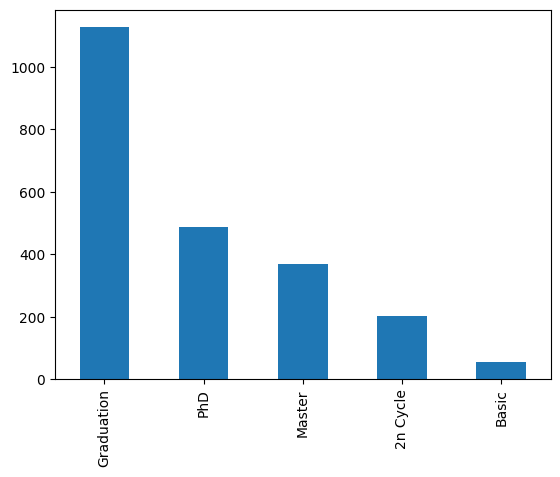



Marital_Status


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


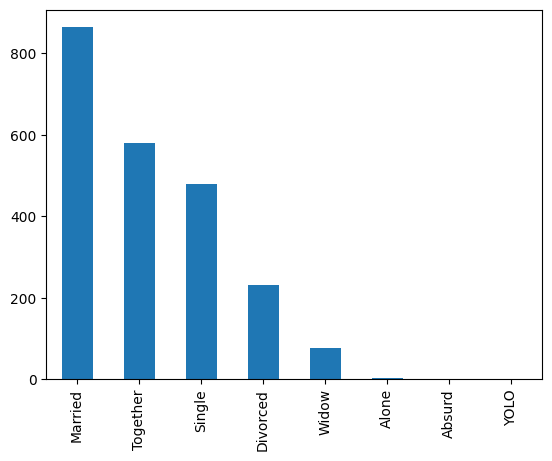

In [13]:
df_marketing_campaign.select_dtypes(include='object').value_counts()

df_marketing_campaign_object = df_marketing_campaign.select_dtypes(include='object')
df_marketing_campaign_object_columns = df_marketing_campaign.select_dtypes(include='object').columns

for col in df_marketing_campaign_object_columns:
  print(col)
  print('\n')
  print(df_marketing_campaign_object[col].value_counts())
  df_marketing_campaign_object[col].value_counts().plot(kind='bar')
  plt.show()
  print('\n')


---

To do in object columns:
1. Ordinal encoder in Education column
2. Drop Absurd and YOLO values, group Alone with Single, and apply One Hot Encoder in Marital_Status column

---

## Datetime column

<AxesSubplot: >

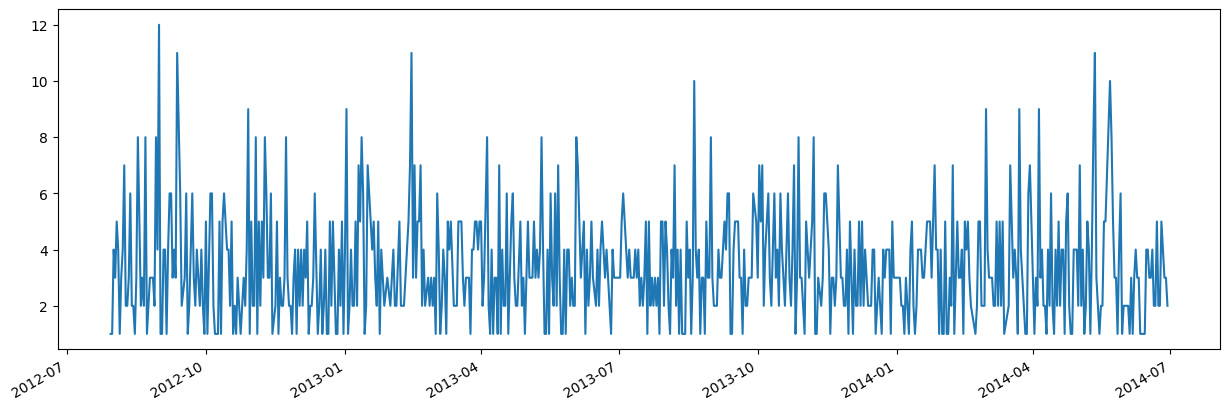

In [14]:
df_marketing_campaign['Dt_Customer'].value_counts().plot(figsize=(15,5))

## Cleaning and Feature Engineering

In [15]:
df_marketing_campaign.describe(include=['object', 'number'])


ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome      Recency     MntWines    MntFruits  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.444196     0.506250    49.109375   303.935714    26.302232   
std        0.538398     0.544538    28.962453   336.597393    39.773434   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000    24.000000    23.750000     1.000000   
50%        0.000000     0.000000    49.000000   173.500000     8.000000   
75%        1.000000     1.000000    74.000000   504.250000    33.000000   
max        2.000000     2.000000    99.000000  1493.000000   199.000000   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count       2240.000000      2240.000000       2240.000000   2240.000000   
unique              NaN              NaN               NaN           NaN   
top                 NaN              NaN               NaN           NaN   
freq                NaN              NaN               NaN           NaN   
mean         166.950000        37.525446         27.062946     44.021875   
std          225.715373        54.628979         41.280498     52.167439   
min            0.000000         0.000000          0.000000      0.000000   
25%           16.000000         3.000000          1.000000      9.000000   
50%           67.000000        12.000000          8.000000     24.000000   
75%          232.000000        50.000000         33.000000     56.000000   
max         1725.000000       259.000000        263.000000    362.000000   

        NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count         2240.000000      2240.000000          2240.000000   
unique                NaN              NaN                  NaN   
top                   NaN              NaN                  NaN   
freq                  NaN              NaN                  NaN   
mean             2.325000         4.084821             2.662054   
std              1.932238         2.778714             2.923101   
min              0.000000         0.000000             0.000000   
25%              1.000000         2.000000             0.000000   
50%              2.000000         4.000000             2.000000   
75%              3.000000         6.000000             4.000000   
max             15.000000        27.000000            28.000000   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2240.000000        2240.000000   2240.000000   2240.000000   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
freq                  NaN                NaN           NaN           NaN   
mean             5.790179           5.316518      0.072768      0.0745

### Year_Birth Column

We create a new column to determine if makes sense the age that people had at the moment of enrollment with the company. If not, we drop those rows

<AxesSubplot: >

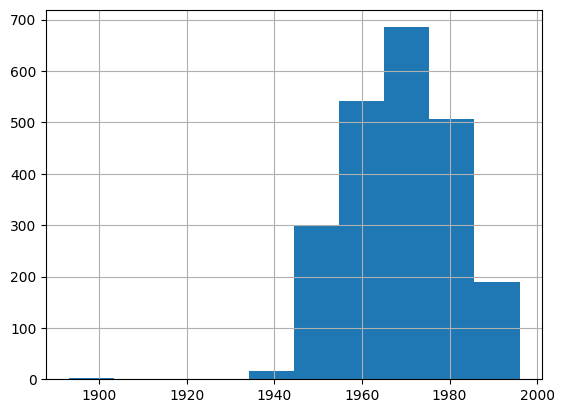

In [16]:
df_marketing_campaign['Year_Birth'].hist()

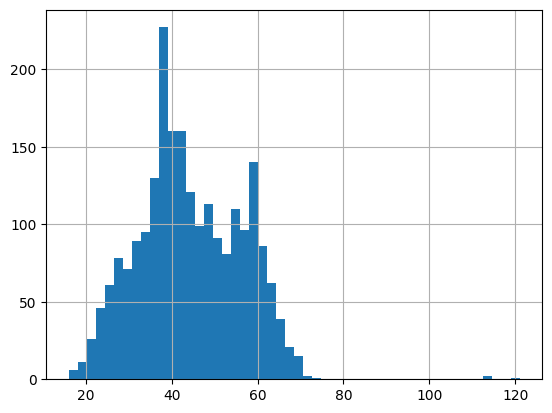

61     36
62     50
63     30
64     32
65     18
66     21
67     12
68      9
69      6
70      9
71      1
72      1
73      1
113     1
114     1
121     1
Name: age_customer_enrollment, dtype: int64


In [17]:
df_marketing_campaign['age_customer_enrollment'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%d-%m-%Y').dt.year - pd.to_datetime(df_marketing_campaign['Year_Birth'], format='%Y').dt.year

df_marketing_campaign['age_customer_enrollment'].hist(bins=50)
plt.show()
print(df_marketing_campaign[df_marketing_campaign['age_customer_enrollment']> 60]['age_customer_enrollment'].value_counts().sort_index())

Drop rows where the age of the customer is more than 73

<AxesSubplot: >

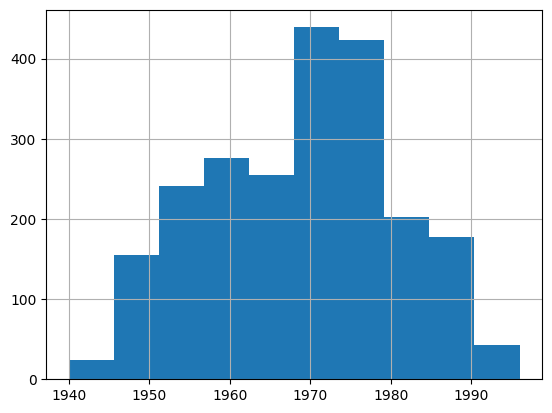

In [18]:
index_to_drop = df_marketing_campaign[df_marketing_campaign['age_customer_enrollment']> 73].index

df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)
df_marketing_campaign['Year_Birth'].hist()

### Income Column

First, we drop the null values that we have only found in the Income column, then we analize for outliers and remove if considered

In [19]:
df_marketing_campaign.dropna(inplace=True)

In [20]:
df_marketing_campaign['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [21]:
df_marketing_campaign['Income'].sort_values(ascending=False).head(15)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
203     102160.0
124     101970.0
650      98777.0
1113     98777.0
Name: Income, dtype: float64

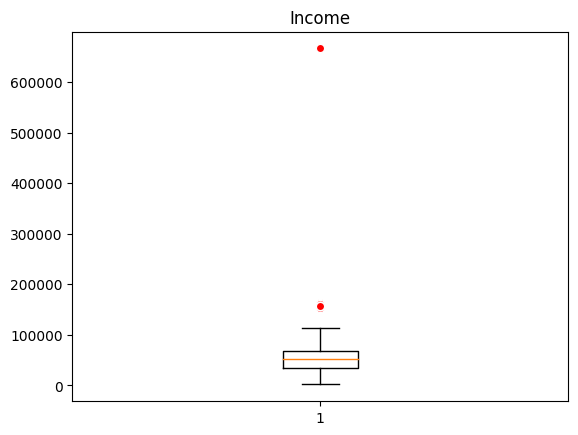

In [22]:
plt.boxplot(df_marketing_campaign['Income'], flierprops=red_circle)
plt.title('Income')
plt.show()

In [23]:
index_to_drop = df_marketing_campaign['Income'][df_marketing_campaign['Income'] == 666666].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

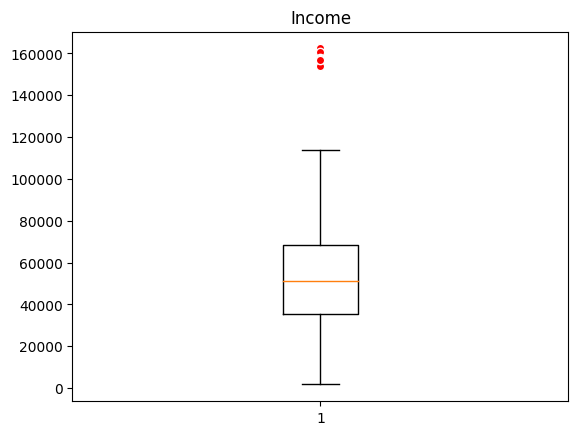

In [24]:
plt.boxplot(df_marketing_campaign['Income'], flierprops=red_circle)
plt.title('Income')
plt.show()

### MntMeatProducts Column

Remove outliers

In [25]:
df_marketing_campaign['MntMeatProducts'].describe()

count    2212.000000
mean      167.029837
std       224.254493
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [26]:
df_marketing_campaign['MntMeatProducts'].sort_values(ascending=False).head(15)

21      1725
1653    1725
687     1622
164     1582
1358     984
1808     981
456      974
2109     968
1031     961
126      951
1958     951
1259     946
561      940
1713     936
1721     935
Name: MntMeatProducts, dtype: int64

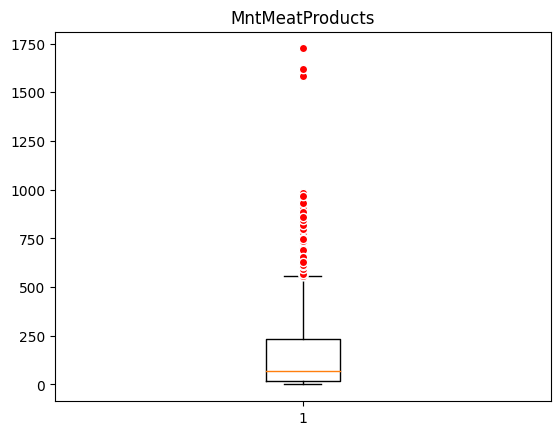

In [27]:
plt.boxplot(df_marketing_campaign['MntMeatProducts'], flierprops=red_circle)
plt.title('MntMeatProducts')
plt.show()

In [28]:
index_to_drop = df_marketing_campaign['MntMeatProducts'][df_marketing_campaign['MntMeatProducts'] > 1500].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

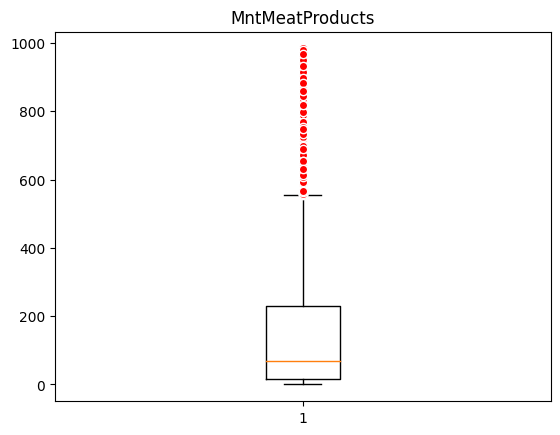

In [29]:
plt.boxplot(df_marketing_campaign['MntMeatProducts'], flierprops=red_circle)
plt.title('MntMeatProducts')
plt.show()

### MntSweetProducts Column

In [30]:
df_marketing_campaign['MntSweetProducts'].describe()

count    2208.000000
mean       27.092391
std        41.114069
min         0.000000
25%         1.000000
50%         8.000000
75%        33.250000
max       262.000000
Name: MntSweetProducts, dtype: float64

In [31]:
df_marketing_campaign['MntSweetProducts'].sort_values(ascending=False).head(15)

1898    262
634     198
1513    197
1671    196
1253    195
2012    194
456     194
1484    194
2168    192
470     192
2096    192
461     191
1259    189
347     189
1824    188
Name: MntSweetProducts, dtype: int64

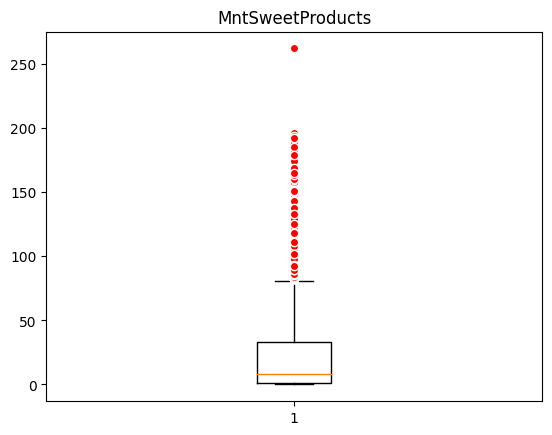

In [32]:
plt.boxplot(df_marketing_campaign['MntSweetProducts'], flierprops=red_circle)
plt.title('MntSweetProducts')
plt.show()

In [33]:
index_to_drop = df_marketing_campaign['MntSweetProducts'][df_marketing_campaign['MntSweetProducts'] > 200].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

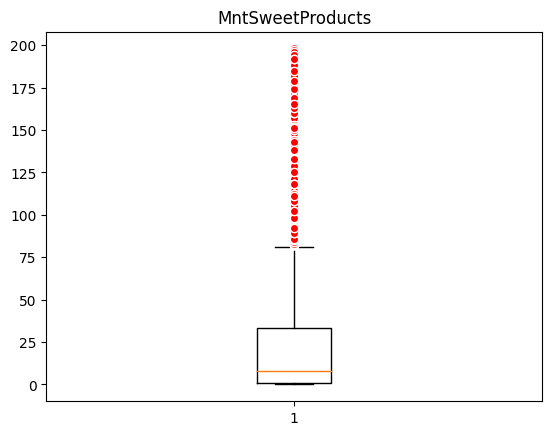

In [34]:
plt.boxplot(df_marketing_campaign['MntSweetProducts'], flierprops=red_circle)
plt.title('MntSweetProducts')
plt.show()

### NumWebPurchases Column

In [35]:
df_marketing_campaign['NumWebPurchases'].describe()

count    2207.000000
mean        4.085184
std         2.695988
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        25.000000
Name: NumWebPurchases, dtype: float64

In [36]:
df_marketing_campaign['NumWebPurchases'].sort_values(ascending=False).head(15)

1975    25
1806    23
2033    11
2171    11
1252    11
412     11
2145    11
1226    11
219     11
1539    11
209     11
202     11
2013    11
983     11
2030    11
Name: NumWebPurchases, dtype: int64

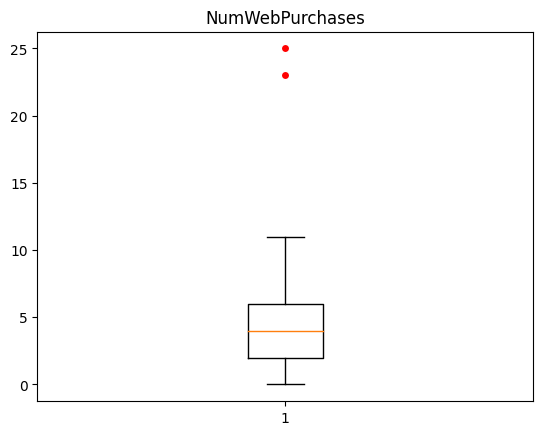

In [37]:
plt.boxplot(df_marketing_campaign['NumWebPurchases'], flierprops=red_circle)
plt.title('NumWebPurchases')
plt.show()

In [38]:
index_to_drop = df_marketing_campaign['NumWebPurchases'][df_marketing_campaign['NumWebPurchases'] > 20].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

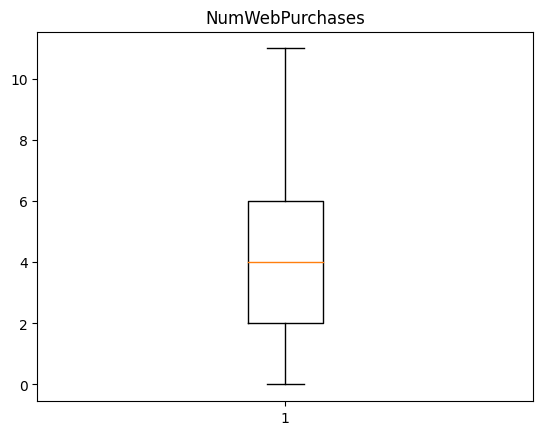

In [39]:
plt.boxplot(df_marketing_campaign['NumWebPurchases'], flierprops=red_circle)
plt.title('NumWebPurchases')
plt.show()

### NumCatalogPurchases Column

In [40]:
df_marketing_campaign['NumCatalogPurchases'].describe()

count    2205.000000
mean        2.632200
std         2.746943
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: NumCatalogPurchases, dtype: float64

In [41]:
df_marketing_campaign['NumCatalogPurchases'].sort_values(ascending=False).head(15)

984     11
1958    11
1745    11
764     11
1212    11
777     11
1940    11
1452    11
636     11
1465    11
627     11
1906    11
591     11
586     11
1492    11
Name: NumCatalogPurchases, dtype: int64

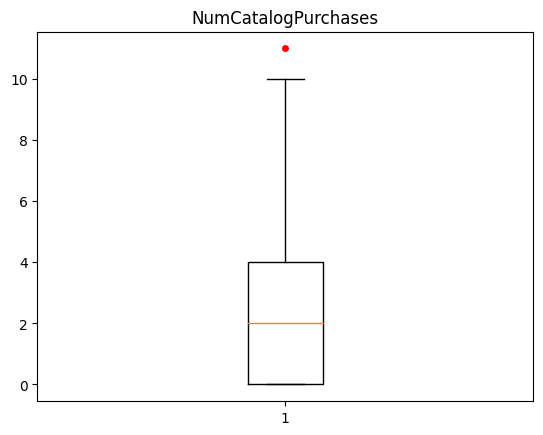

In [42]:
plt.boxplot(df_marketing_campaign['NumCatalogPurchases'], flierprops=red_circle)
plt.title('NumCatalogPurchases')
plt.show()

In [43]:
df_marketing_campaign['NumCatalogPurchases'].value_counts()

0     573
1     489
2     274
3     182
4     181
5     137
6     127
7      79
8      55
10     47
9      42
11     19
Name: NumCatalogPurchases, dtype: int64

We are not going to drop anything here in the NumCatalogPurchases Column

### NumWebVisitsMonth Column

In [44]:
df_marketing_campaign['NumWebVisitsMonth'].describe()

count    2205.000000
mean        5.336508
std         2.414445
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [45]:
df_marketing_campaign['NumWebVisitsMonth'].sort_values(ascending=False).head(15)

1245    20
774     20
9       20
1042    19
1846    19
1328    17
1524    14
981     14
2214    13
605     10
47      10
1868    10
1315     9
890      9
1334     9
Name: NumWebVisitsMonth, dtype: int64

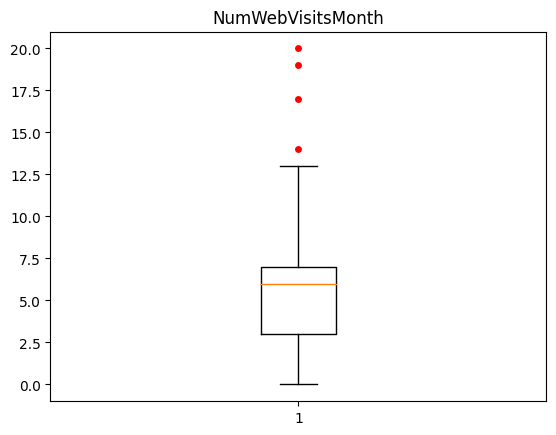

In [46]:
plt.boxplot(df_marketing_campaign['NumWebVisitsMonth'], flierprops=red_circle)
plt.title('NumWebVisitsMonth')
plt.show()

We are not going to drop anything here in the NumWebVisitsMonth Column

### Z_CostContact and Z_Revenue Columns

These columns have constant values and do not add anything valuable

In [47]:
df_marketing_campaign.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

### Education Column

We are going to use Ordinal Encoder to assign each category to a different integer. The order will be:

0. Basic
1. Graduation
2. 2n Cycle
3. Master
4. PhD

In [48]:
df_marketing_campaign['Education'].value_counts()

Graduation    1112
PhD            476
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [49]:
categories = [['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']]
oe_encoder = OrdinalEncoder(categories= categories)


In [50]:
df_marketing_campaign['Education_int'] = oe_encoder.fit_transform(df_marketing_campaign[['Education']])

In [51]:
df_marketing_campaign[['Education', 'Education_int']].value_counts()

Education   Education_int
Graduation  1.0              1112
PhD         4.0               476
Master      3.0               365
2n Cycle    2.0               198
Basic       0.0                54
dtype: int64

In [52]:
oe_encoder.categories_

[array(['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD'], dtype=object)]

### Marital_Status Column

In [53]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     853
Together    570
Single      468
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [54]:
index_to_drop = df_marketing_campaign['Marital_Status'][df_marketing_campaign['Marital_Status'].isin(['YOLO', 'Absurd'])].index

df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)


In [55]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     853
Together    570
Single      468
Divorced    231
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [56]:
df_marketing_campaign['Marital_Status'].replace(['Alone'], ['Single'], inplace=True)
df_marketing_campaign['Marital_Status'].value_counts()

Married     853
Together    570
Single      471
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

In [57]:
df_marketing_campaign_before_encoders = df_marketing_campaign.copy()

In [58]:
ohe_encoder = OneHotEncoder(sparse_output=False)
results_ohe = ohe_encoder.fit_transform(df_marketing_campaign[['Marital_Status']])
df_ohe = pd.DataFrame(results_ohe, columns=ohe_encoder.get_feature_names_out(), index=df_marketing_campaign.index)
# df_ohe
df_marketing_campaign = pd.concat([df_marketing_campaign,df_ohe], axis=1)
columns_to_check = ohe_encoder.get_feature_names_out().tolist()
columns_to_check.append('Marital_Status')
df_marketing_campaign[columns_to_check]

Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                         0.0                     0.0                    1.0   
1                         0.0                     0.0                    1.0   
2                         0.0                     0.0                    0.0   
3                         0.0                     0.0                    0.0   
4                         0.0                     1.0                    0.0   
...                       ...                     ...                    ...   
2235                      0.0                     1.0                    0.0   
2236                      0.0                     0.0                    0.0   
2237                      1.0                     0.0                    0.0   
2238                      0.0                     0.0                    0.0   
2239                      0.0                     1.0                    0.0   

      Marital_Status_Together  Marital_Status_Widow Marital_Status  
0                         0.0                   0.0         Single  
1                         0.0                   0.0         Single  
2                         1.0                   0.0       Together  
3                         1.0                   0.0       Together  
4                         0.0                   0.0        Married  
...                       ...                   ...            ...  
2235                      0.0                   0.0        Married  
2236                      1.0                   0.0       Together  
2237                      0.0                   0.0       Divorced  
2238                      1.0                   0.0       Together  
2239                      0.0                   0.0        Married  

[2201 rows x 6 columns]

In [59]:
df_marketing_campaign.drop(columns=['Marital_Status', 'Education'])

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      5524        1957  58138.0        0         0  2012-09-04       58   
1      2174        1954  46344.0        1         1  2014-03-08       38   
2      4141        1965  71613.0        0         0  2013-08-21       26   
3      6182        1984  26646.0        1         0  2014-02-10       26   
4      5324        1981  58293.0        1         0  2014-01-19       94   
...     ...         ...      ...      ...       ...         ...      ...   
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2236   4001        1946  64014.0        2         1  2014-06-10       56   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  ...  AcceptedCmp3  AcceptedCmp4  \
0               88                  3  ...             0             0   
1                6                  2  ...             0             0   
2               42                  1  ...             0             0   
3                5                  2  ...             0             0   
4               15                  5  ...             0             0   
...            ...                ...  ...           ...           ...   
2235           247                  2  ...             0             0   
2236             8                  7  ...             0             0   
2237            24                  1  ...             0             1   
2238            61                  2  ...             0             0   
2239            21                  3  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0                0             0             0         0         1   
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2235             0             0             0         0         0   
2236             0             1             0         0         0   
2237             0             0             0         0         0   
2238             0             0             0         0         0   
2239             0             0             0         0         1   

      age_customer_enrollment  Education_int  Marital_Status_Divorced  \
0                          55            1.0                      0.0   
1                          60            1.0                      0.0   
2                          48            1.0                      0.0   
3                          30            1.0                      0.0   
4                          3

### Dt_customer Column

We create a new column that contains the difference in days between the first and the last enrollment, and then we drop the Dt_customer column

<AxesSubplot: >

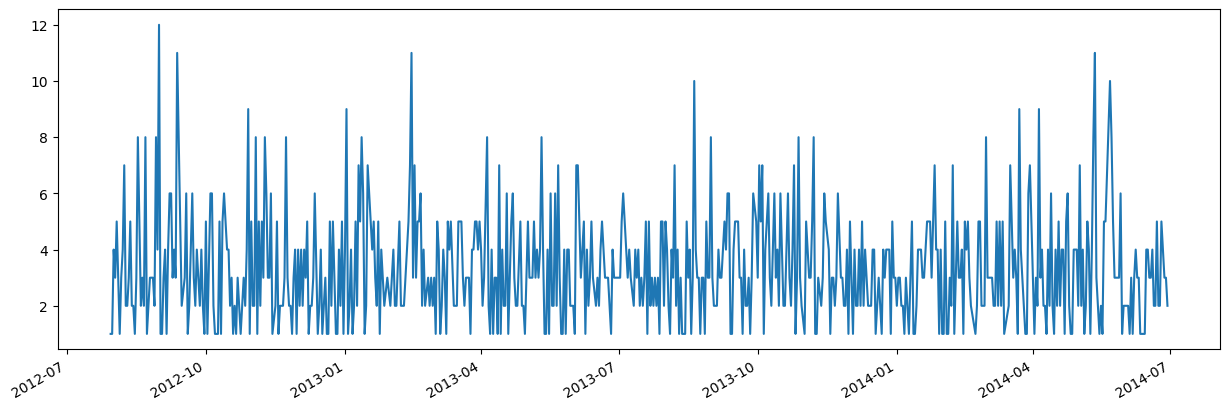

In [60]:
df_marketing_campaign['Dt_Customer'].value_counts().plot(figsize=(15,5))

In [61]:
df_marketing_campaign['Dt_Customer_diff_days'] = (df_marketing_campaign['Dt_Customer'] - df_marketing_campaign['Dt_Customer'].min()).dt.days

In [62]:
df_marketing_campaign[['Dt_Customer','Dt_Customer_diff_days']]

Dt_Customer  Dt_Customer_diff_days
0     2012-09-04                     36
1     2014-03-08                    586
2     2013-08-21                    387
3     2014-02-10                    560
4     2014-01-19                    538
...          ...                    ...
2235  2013-06-13                    318
2236  2014-06-10                    680
2237  2014-01-25                    544
2238  2014-01-24                    543
2239  2012-10-15                     77

[2201 rows x 2 columns]

In [63]:
df_marketing_campaign.drop(columns=['Dt_Customer'], inplace=True)

---
---
---
---
---
---
---

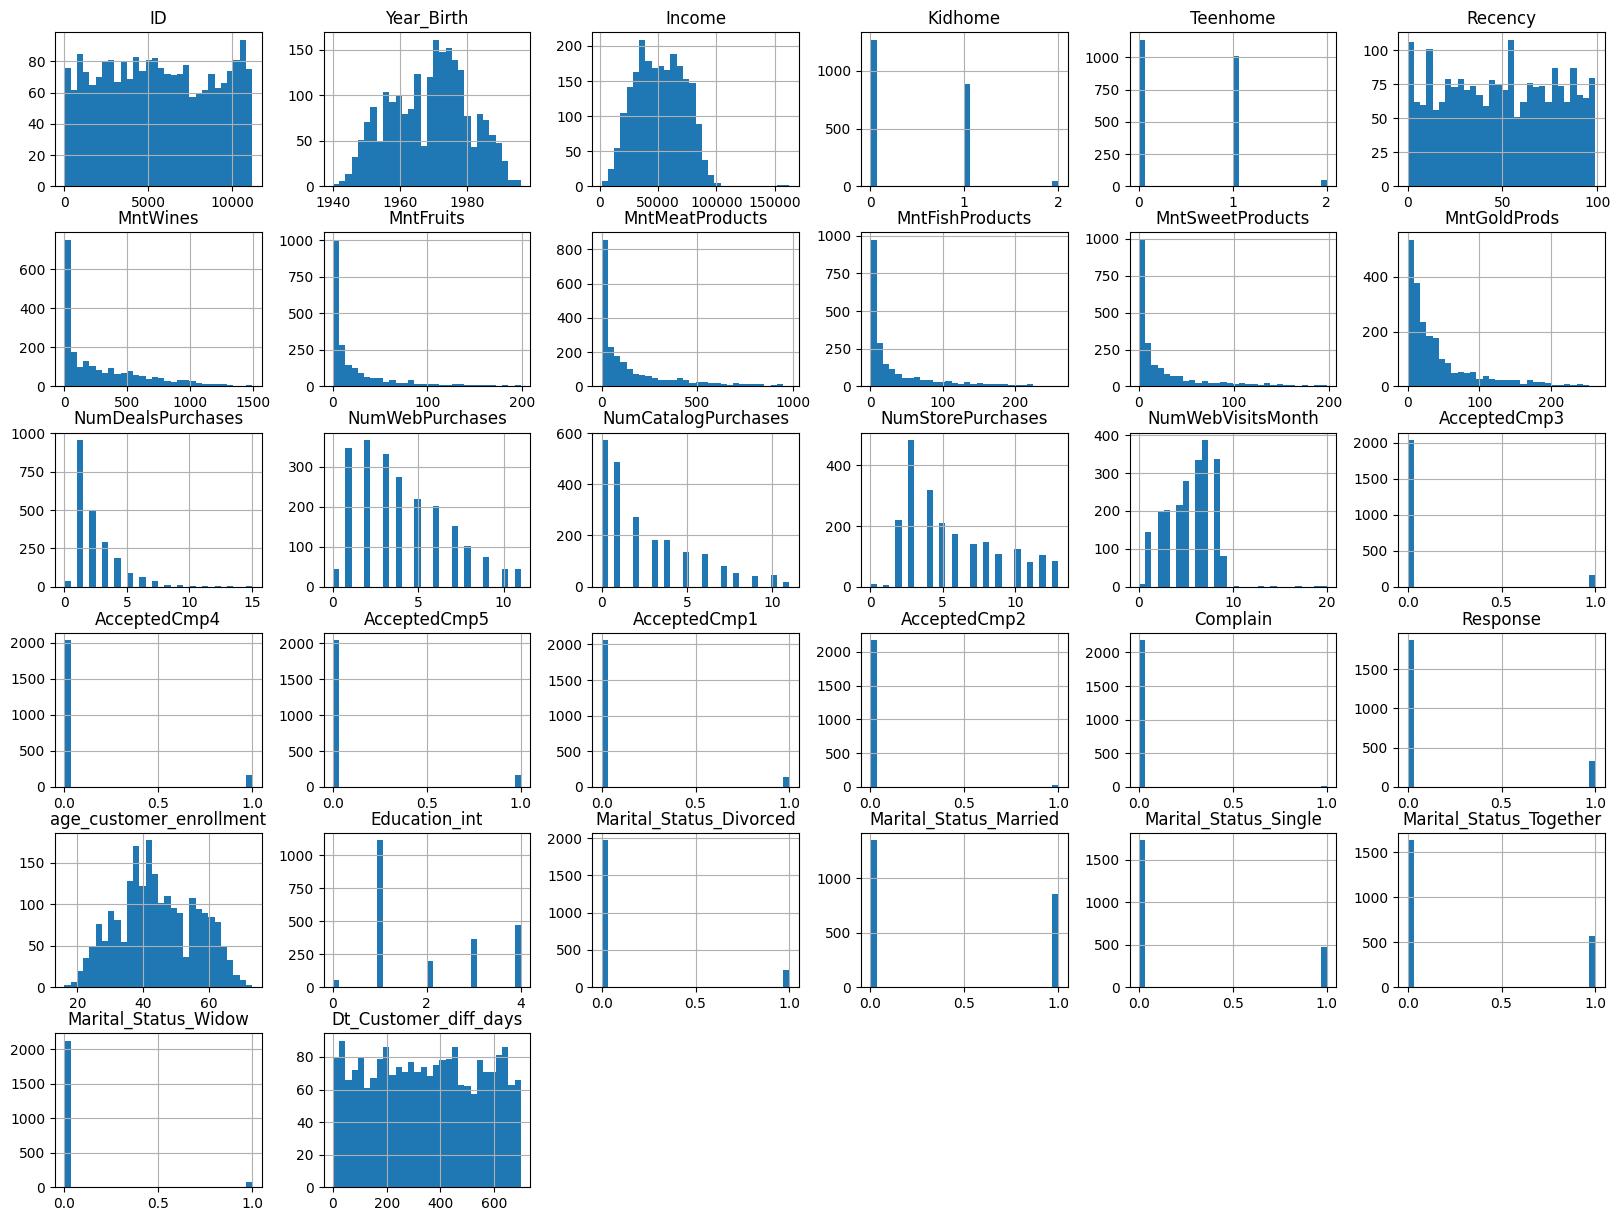

In [64]:
df_marketing_campaign.hist(bins=30, figsize=(20, 15))
plt.show()

## Looking for Duplicates

In [65]:
df_marketing_campaign['ID'].value_counts().sort_values()

5524     1
7446     1
965      1
6177     1
4855     1
        ..
10084    1
4201     1
4478     1
8372     1
9405     1
Name: ID, Length: 2201, dtype: int64

In [66]:
df_marketing_campaign[df_marketing_campaign.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, age_customer_enrollment, Education_int, Marital_Status_Divorced, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow, Dt_Customer_diff_days]
Index: []

[0 rows x 34 columns]

## New columns (Feature Engineering)

In [67]:
columns_keep = df_marketing_campaign.columns.str.contains('Mnt')
df_marketing_campaign['MntTotal'] = df_marketing_campaign.loc[:,columns_keep].sum(axis=1)

In [68]:
# columns_keep = df_marketing_campaign.columns.str.contains('Num')
# columns_keep = df_marketing_campaign.columns.str.contains('Num') & (~df_marketing_campaign.columns.str.contains('Deal')) & df_marketing_campaign.columns.str.contains('Purchases')
columns_keep = df_marketing_campaign.columns.str.contains('Num') & df_marketing_campaign.columns.str.contains('Purchases')
df_marketing_campaign['NumTotalPurchases'] = df_marketing_campaign.loc[:,columns_keep].sum(axis=1)

In [69]:
# columns_keep = df_marketing_campaign.columns.str.contains('Num')
columns_keep = df_marketing_campaign.columns.str.contains('Num') & df_marketing_campaign.columns.str.contains('Purchases')

# df_marketing_campaign.loc[:,columns_keep]
min_value = (df_marketing_campaign['NumTotalPurchases'] - df_marketing_campaign['NumDealsPurchases']).min()
df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] - df_marketing_campaign['NumDealsPurchases'] == min_value), columns_keep]

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
655                   0                0                    0   
981                   0                0                    0   
1245                 15                0                    0   
1524                  0                0                    0   
1846                 15                0                    0   
2132                  0                0                    0   

      NumStorePurchases  NumTotalPurchases  
655                   0                  0  
981                   0                  0  
1245                  0                 15  
1524                  0                  0  
1846                  0                 15  
2132                  0                  0

In [70]:
# df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] == 0), columns_keep]
df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] == 0)]


ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
655    5555        1975  Graduation       Divorced  153924.0        0   
981    3955        1965  Graduation       Divorced    4861.0        0   
1524  11110        1973  Graduation         Single    3502.0        1   
2132  11181        1949         PhD        Married  156924.0        0   

      Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
655          0       81         1          1                1   
981          0       20         2          1                1   
1524         0       56         2          1                1   
2132         0       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp1  \
655                 1                 1             1  ...             0   
981                 1                 0             1  ...             0   
1524                0                 0             1  ...             0   
2132                1                 1             1  ...             0   

      AcceptedCmp2  Complain  Response  age_customer_enrollment  \
655              0         0         0                       39   
981              0         0         0                       49   
1524             0         0         0                       40   
2132             0         0         0                       64   

      Education_int  Marital_Status_Divorced  Marital_Status_Married  \
655             1.0                      1.0                     0.0   
981             1.0                      1.0                     0.0   
1524            1.0                      0.0                     0.0   
2132            4.0                      0.0                     1.0   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
655                     0.0                      0.0                   0.0   
981                     0.0                      0.0                   0.0   
1524                    1.0                      0.0                   0.0   
2132                    0.0                      0.0                   0.0   

      Dt_Customer_diff_days  MntTotal  NumTotalPurchases  
655                     557         6                  0  
981                     692         6                  0  
1524                    257         5                  0  
2132                    395         8                  0  

[4 rows x 36 columns]

---

There are customers that have spent on products but never made a purchase. We drop those cases because they do not make sense. Though, in a real case scenario, this detection could be informed to discover the origin of these cases and fix where appropiate in the data collection.

---


In [71]:
index_to_drop = df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] == 0)].index
df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)

In [72]:
df_marketing_campaign['RatioTotalMntPurchases'] = df_marketing_campaign['MntTotal'] / df_marketing_campaign['NumTotalPurchases']
df_marketing_campaign['RatioMntWines'] = df_marketing_campaign['MntWines'] / df_marketing_campaign['MntTotal']
df_marketing_campaign['RatioMntFruits'] = df_marketing_campaign['MntFruits'] / df_marketing_campaign['MntTotal']
df_marketing_campaign['RatioMntMeatProducts'] = df_marketing_campaign['MntMeatProducts'] / df_marketing_campaign['MntTotal']
df_marketing_campaign['RatioMntFishProducts'] = df_marketing_campaign['MntFishProducts'] / df_marketing_campaign['MntTotal']
df_marketing_campaign['RatioMntSweetProducts'] = df_marketing_campaign['MntSweetProducts'] / df_marketing_campaign['MntTotal']
df_marketing_campaign['RatioMntGoldProducts'] = df_marketing_campaign['MntGoldProds'] / df_marketing_campaign['MntTotal']

In [73]:
df_marketing_campaign.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

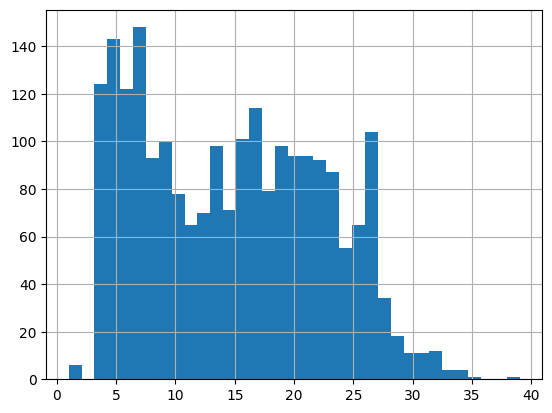

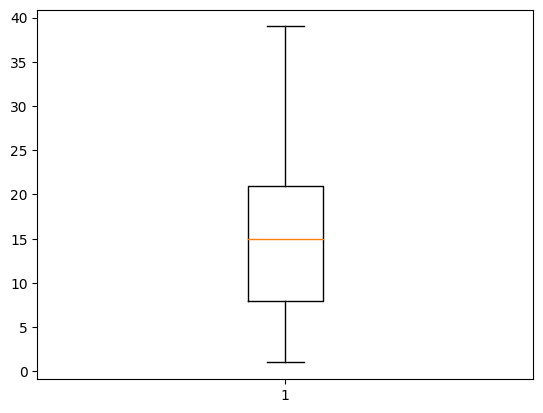

In [74]:
df_marketing_campaign['NumTotalPurchases'].hist(bins=35)
plt.show()

plt.boxplot(df_marketing_campaign['NumTotalPurchases'])
plt.show()

In [89]:
columns_keep = df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response') & ~df_marketing_campaign.columns.str.contains('Any')
# columns_keep = (df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response')) & ~df_marketing_campaign.columns.str.contains('Any')

df_marketing_campaign['AcceptedOfferAnyCmp'] = df_marketing_campaign.loc[:,columns_keep].any(axis=1).astype(int)

columns_keep = (df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response')) & ~df_marketing_campaign.columns.str.contains('Any')
# columns_keep = (df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response')) & ~df_marketing_campaign.columns.str.contains('Any') & ~df_marketing_campaign.columns.str.contains('Total')
df_marketing_campaign['AcceptedOfferTotalCmp'] = df_marketing_campaign.loc[:,columns_keep].sum(axis=1)

columns_keep = df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response') 

df_marketing_campaign.loc[:,columns_keep].sort_values(by=['AcceptedOfferTotalCmp'])

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1119             0             0             0             0             0   
1132             0             0             0             0             0   
1131             0             0             0             0             0   
1899             0             0             0             0             0   
1128             0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1922             0             1             1             1             1   
559              0             1             1             1             1   
1087             0             1             1             1             1   
824              0             1             1             1             1   
990              0             1             1             1             1   

      Response  AcceptedOfferAnyCmp  AcceptedOfferTotalCmp  
1119         0                    0                      0  
1132         0                    0                      0  
1131         0                    0                      0  
1899         0                    0                      0  
1128         0                    0                      0  
...        ...                  ...                    ...  
1922         1                    1                      5  
559          1                    1                      5  
1087         1                    1                      5  
824          1                    1                      5  
990          1                    1                      5  

[2197 rows x 8 columns]

<AxesSubplot: >

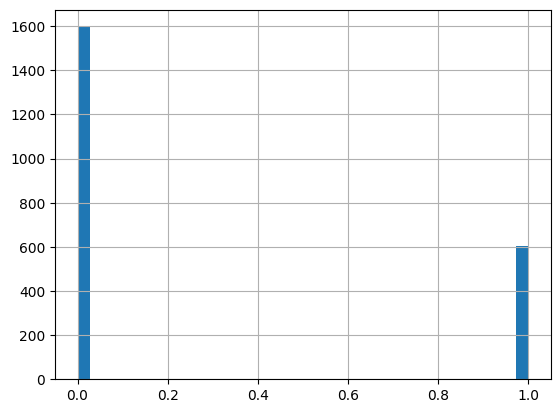

In [90]:
df_marketing_campaign['AcceptedOfferAnyCmp'].hist(bins=35)

In [243]:
df_marketing_campaign['RatioNumWebPurchases'] = df_marketing_campaign['NumWebPurchases'] / df_marketing_campaign['NumTotalPurchases']
df_marketing_campaign['RatioNumCatalogPurchases'] = df_marketing_campaign['NumCatalogPurchases'] / df_marketing_campaign['NumTotalPurchases']
df_marketing_campaign['RatioNumStorePurchases'] = df_marketing_campaign['NumStorePurchases'] / df_marketing_campaign['NumTotalPurchases']
df_marketing_campaign['RatioNumDealsPurchases'] = df_marketing_campaign['NumDealsPurchases'] / df_marketing_campaign['NumTotalPurchases']

In [244]:
df_marketing_campaign.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'], inplace=True)

In [247]:
df_marketing_campaign_num = df_marketing_campaign.drop(columns=['ID']).select_dtypes(exclude='object')

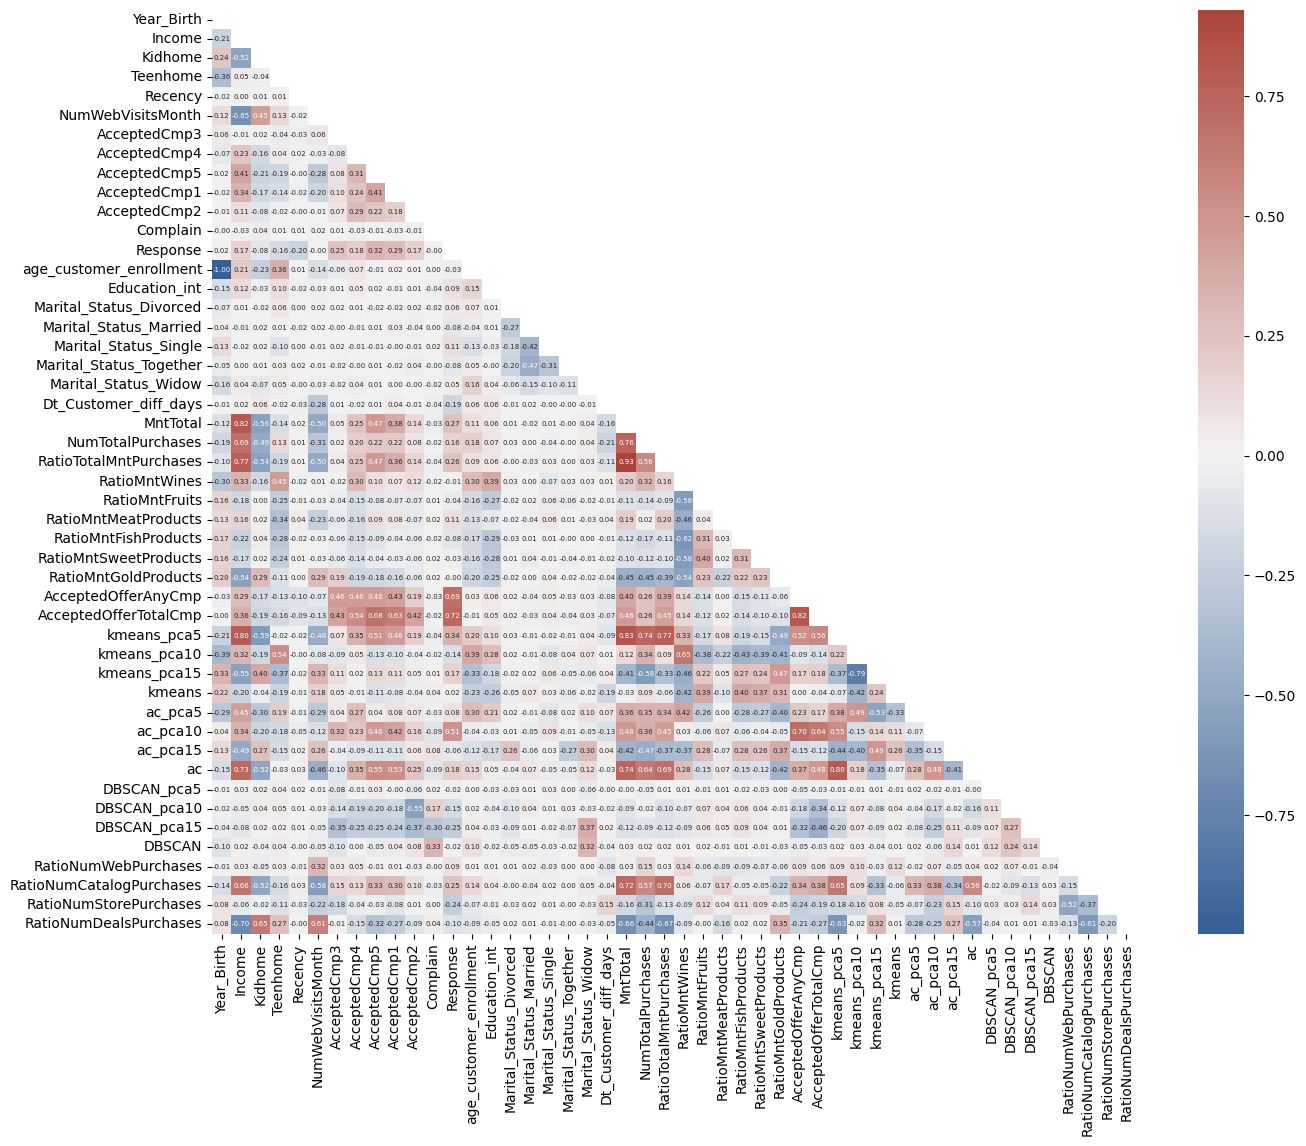

In [250]:
# CREATE THE MATRIX
matrix = df_marketing_campaign_num.corr()

# CREATE CMAP
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                          n=9, center="light", as_cmap=True)
# CREATE A MASK
mask = np.triu(np.ones_like(matrix, dtype=bool))

# MAKE FIGSIZE BIGGER
fig, ax = plt.subplots(figsize=(16,12))

# PLOT THE MATRIX
_ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
          fmt='.2f', square=True, cmap=cmap, ax=ax, annot_kws={"fontsize":5})

In [251]:
standard_scaler = StandardScaler()

array_marketing_campaign_num_scaled = standard_scaler.fit_transform(df_marketing_campaign_num)

In [252]:
df_marketing_campaign_num_scaled =  pd.DataFrame(array_marketing_campaign_num_scaled, columns=df_marketing_campaign_num.columns)
df_marketing_campaign_num_scaled.head()

Year_Birth    Income   Kidhome  Teenhome   Recency  NumWebVisitsMonth  \
0   -1.017932  0.305073 -0.825923 -0.931979  0.309131           0.695524   
1   -1.274410 -0.261176  1.035157  0.907696 -0.383043          -0.139713   
2   -0.333993  0.952029 -0.825923 -0.931979 -0.798348          -0.557331   
3    1.290364 -1.206909  1.035157 -0.931979 -0.798348           0.277905   
4    1.033887  0.312514  1.035157 -0.931979  1.555046          -0.139713   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0     -0.283086     -0.284023     -0.280262     -0.261877     -0.117661   
1     -0.283086     -0.284023     -0.280262     -0.261877     -0.117661   
2     -0.283086     -0.284023     -0.280262     -0.261877     -0.117661   
3     -0.283086     -0.284023     -0.280262     -0.261877     -0.117661   
4     -0.283086     -0.284023     -0.280262     -0.261877     -0.117661   

   Complain  Response  age_customer_enrollment  ...  kmeans_pca15    kmeans  \
0 -0.095849  2.374334                 0.927395  ...      0.452661 -0.413698   
1 -0.095849 -0.421171                 1.353630  ...     -0.403188 -1.314486   
2 -0.095849 -0.421171                 0.330667  ...     -1.259036  0.487090   
3 -0.095849 -0.421171                -1.203779  ...      1.308509  1.387877   
4 -0.095849 -0.421171                -0.948038  ...     -1.259036  0.487090   

    ac_pca5  ac_pca10  ac_pca15        ac  DBSCAN_pca5  DBSCAN_pca10  \
0  0.045944  2.031877 -0.590632  0.598088     0.052006      0.086332   
1 -1.177555 -0.234130  1.976729 -0.890020     0.052006      0.086332   
2 -0.565805  0.672273 -0.957397  0.598088     0.052006      0.086332   
3 -1.177555 -0.234130 -0.223866 -0.890020     0.052006      0.086332   
4 -0.565805  0.672273 -0.957397  0.598088     0.052006      0.086332   

   DBSCAN_pca15    DBSCAN  RatioNumWebPurchases  RatioNumCatalogPurchases  \
0      0.139061 -0.073599              0.563684                  2.076630   
1      0.139061 -0.073599             -1.059480                  0.203086   
2      0.139061 -0.073599              1.208918                 -0.370448   
3      0.139061 -0.073599             -0.177326                 -1.135160   
4      0.139061 -0.073599             -0.038038                  0.132652   

   RatioNumStorePurchases  RatioNumDealsPurchases  
0               -2.149970               -0.547077  
1               -0.666970                1.379277  
2                0.555283               -1.200661  
3                0.758991                0.626795  
4               -0.817071                0.745608  

[5 rows x 48 columns]

In [253]:
df_marketing_campaign_num_scaled.describe()

Year_Birth        Income       Kidhome      Teenhome       Recency  \
count  2.197000e+03  2.197000e+03  2.197000e+03  2.197000e+03  2.197000e+03   
mean   9.404099e-15  5.659762e-17 -5.659762e-18  6.468300e-18  1.067269e-16   
std    1.000228e+00  1.000228e+00  1.000228e+00  1.000228e+00  1.000228e+00   
min   -2.471304e+00 -2.403166e+00 -8.259231e-01 -9.319791e-01 -1.698175e+00   
25%   -8.469475e-01 -7.903603e-01 -8.259231e-01 -9.319791e-01 -8.675654e-01   
50%    9.346969e-02 -1.991804e-02 -8.259231e-01 -9.319791e-01 -2.347156e-03   
75%    6.919170e-01  7.954630e-01  1.035157e+00  9.076957e-01  8.628711e-01   
max    2.316274e+00  5.310714e+00  2.896237e+00  2.747371e+00  1.728089e+00   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count       2.197000e+03  2.197000e+03  2.197000e+03  2.197000e+03   
mean        8.085375e-17 -1.455367e-17  8.166229e-17  3.153296e-17   
std         1.000228e+00  1.000228e+00  1.000228e+00  1.000228e+00   
min        -2.227805e+00 -2.830860e-01 -2.840228e-01 -2.802622e-01   
25%        -9.749498e-01 -2.830860e-01 -2.840228e-01 -2.802622e-01   
50%         2.779054e-01 -2.830860e-01 -2.840228e-01 -2.802622e-01   
75%         6.955237e-01 -2.830860e-01 -2.840228e-01 -2.802622e-01   
max         6.124563e+00  3.532496e+00  3.520844e+00  3.568088e+00   

       AcceptedCmp1  AcceptedCmp2      Complain      Response  \
count  2.197000e+03  2.197000e+03  2.197000e+03  2.197000e+03   
mean  -2.587320e-17 -3.153296e-17 -8.085375e-18 -1.940490e-17   
std    1.000228e+00  1.000228e+00  1.000228e+00  1.000228e+00   
min   -2.618774e-01 -1.176606e-01 -9.584860e-02 -4.211707e-01   
25%   -2.618774e-01 -1.176606e-01 -9.584860e-02 -4.211707e-01   
50%   -2.618774e-01 -1.176606e-01 -9.584860e-02 -4.211707e-01   
75%   -2.618774e-01 -1.176606e-01 -9.584860e-02 -4.211707e-01   
max    3.818581e+00  8.499020e+00  1.043312e+01  2.374334e+00   

       age_customer_enrollment  ...  kmeans_pca15        kmeans       ac_pca5  \
count             2.197000e+03  ...  2.197000e+03  2.197000e+03  2.197000e+03   
mean              7.761960e-17  ...  8.732205e-17 -9.379035e-17 -2.749027e-17   
std               1.000228e+00  ...  1.000228e+00  1.000228e+00  1.000228e+00   
min              -2.397236e+00  ... -1.259036e+00 -1.314486e+00 -1.177555e+00   
25%              -6.922968e-01  ... -1.259036e+00 -1.314486e+00 -1.177555e+00   
50%              -9.556816e-02  ... -4.031875e-01  4.870896e-01  4.594385e-02   
75%               8.421483e-01  ...  1.308509e+00  4.870896e-01  6.576932e-01   
max               2.461840e+00  ...  1.308509e+00  1.387877e+00  1.881192e+00   

           ac_pca10      ac_pca15            ac   DBSCAN_pca5  DBSCAN_pca10  \
count  2.197000e+03  2.197000e+03  2.197000e+03  2.197000e+03  2.197000e+03   
mean   3.880980e-17  4.204395e-17  7.761960e-17  1.697929e-17  1.940490e-17   
std    1.000228e+00  1.000228e+00  1.000228e+00  1.000228e+00  1.000228e+00   
min   -1.140533e+00 -9.573975e-01 -8.900205e-01 -2.804399e+00 -5.661315e+00   
25%   -6.873314e-01 -9.573975e-01 -8.900205e-01  5.200554e-02  8.633243e-02   
50%   -2.341300e-01 -2.238657e-01 -8.900205e-01  5.200554e-02  8.633243e-02   
75%    6.722728e-01  1.429001e-01  5.980883e-01  5.200554e-02  8.633243e-02   
max    2.031877e+00  1.976729e+00  2.086197e+00  1.433403e+01  1.158163e+01   

       DBSCAN_pca15        DBSCAN  RatioNumWebPurchases  \
count  2.197000e+03  2.197000e+03          2.197000e+03   
mean  -1.131952e-17 -2.425612e-18          4.075029e-16   
std    1.000228e+00  1.000228e+00          1.000228e+00   
min   -3.111110e+00 -2.146633e+00         -2.823790e+00   
25%    1.390606e-01 -7.359886e-02         -7.066183e-01   
50%    1.390606e-01 -7.359886e-02         -6.226187e-02   
75%    1.390606e-01 -7.359886e-02          7.048292e-01   
max    3.389231e+00  1.236461e+01          7.762067e+00   

       RatioNumCatalogPurchases  RatioNumStorePurchases  \
count              2.197000e+03            2.19

# PCA

In [254]:
pca = PCA()
pca.fit(df_marketing_campaign_num_scaled)

PCA()

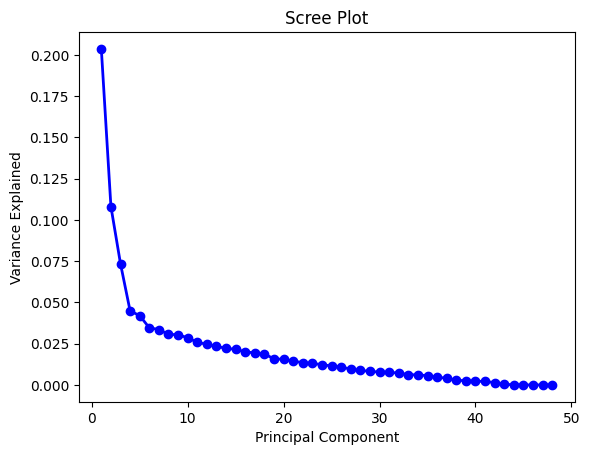

In [255]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

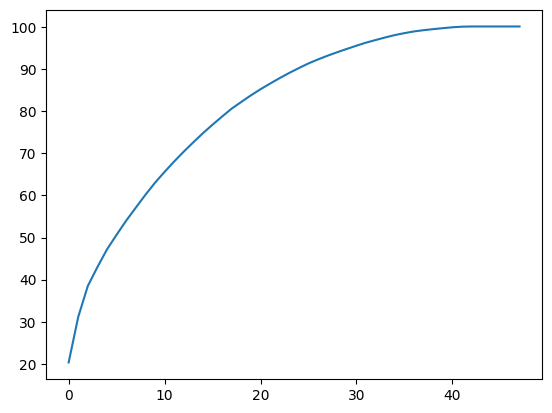

In [256]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100))


In [257]:
array_marketing_campaign_num_scaled_pca = pca.transform(df_marketing_campaign_num_scaled)
df_marketing_campaign_num_scaled_pca5 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:6]
df_marketing_campaign_num_scaled_pca10 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:11]
df_marketing_campaign_num_scaled_pca15 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:16]

# K-Means

## With PCA (5, 10, 15 components)

In [258]:
sum_of_squared_distances_pca5 = []
silhouette_scores_pca5 = []
sum_of_squared_distances_pca10 = []
silhouette_scores_pca10 = []
sum_of_squared_distances_pca15 = []
silhouette_scores_pca15 = []
k = range(2,15)
for _ in k:
  kmeans_model_pca5 = KMeans(n_clusters=_, n_init='auto')
  kmeans_model_pca10 = KMeans(n_clusters=_, n_init='auto')
  kmeans_model_pca15 = KMeans(n_clusters=_, n_init='auto')
  y_pca5 = kmeans_model_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
  y_pca10 = kmeans_model_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
  y_pca15 = kmeans_model_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)
  sum_of_squared_distances_pca5.append(kmeans_model_pca5.inertia_)
  sum_of_squared_distances_pca10.append(kmeans_model_pca10.inertia_)
  sum_of_squared_distances_pca15.append(kmeans_model_pca15.inertia_)
  silhouette_scores_pca5.append(silhouette_score(df_marketing_campaign_num_scaled_pca5, y_pca5))
  silhouette_scores_pca10.append(silhouette_score(df_marketing_campaign_num_scaled_pca10, y_pca10))
  silhouette_scores_pca15.append(silhouette_score(df_marketing_campaign_num_scaled_pca15, y_pca15))

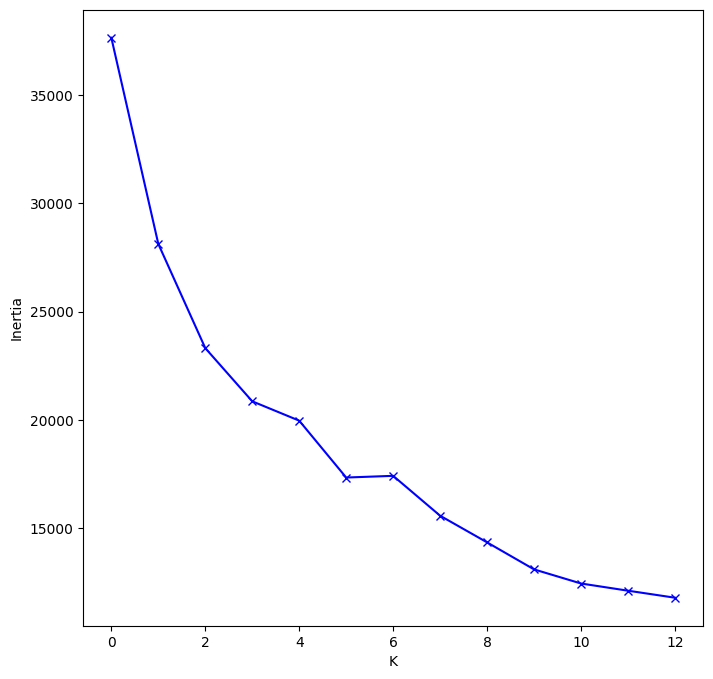

In [259]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances_pca5, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

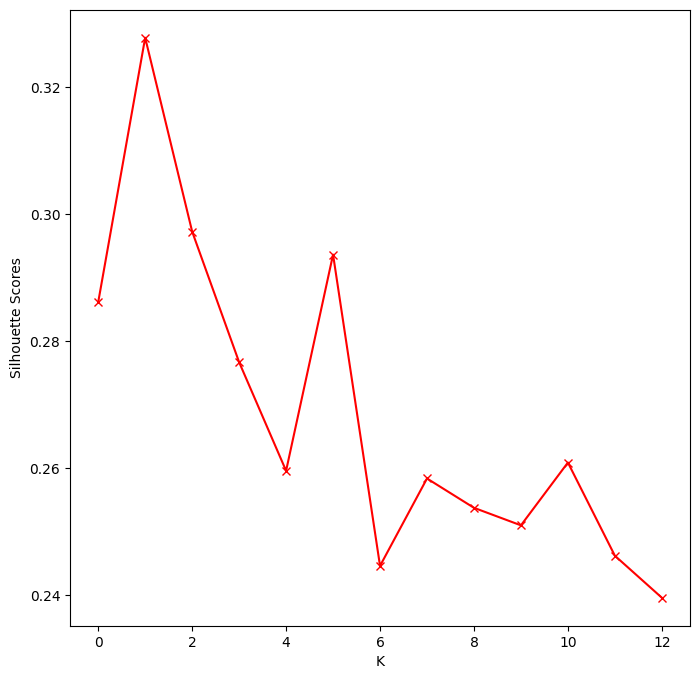

In [260]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores_pca5, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

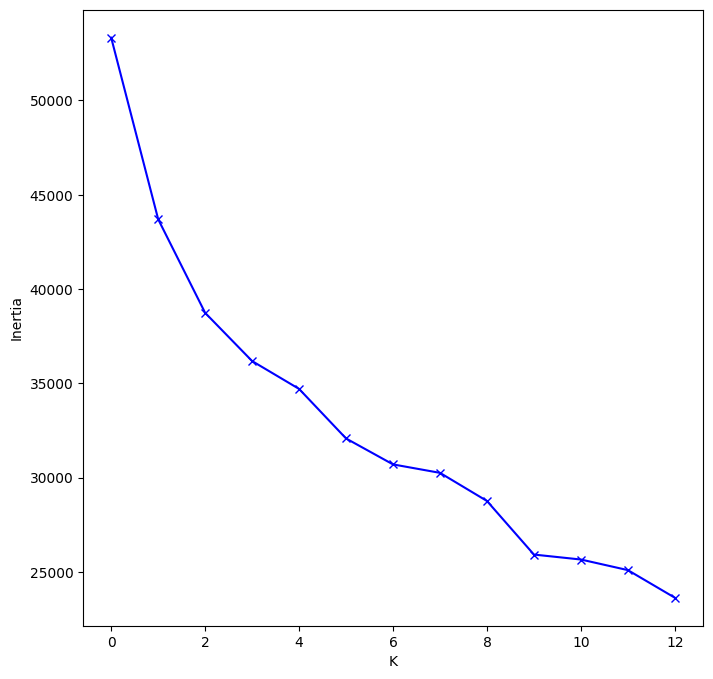

In [261]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances_pca10, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

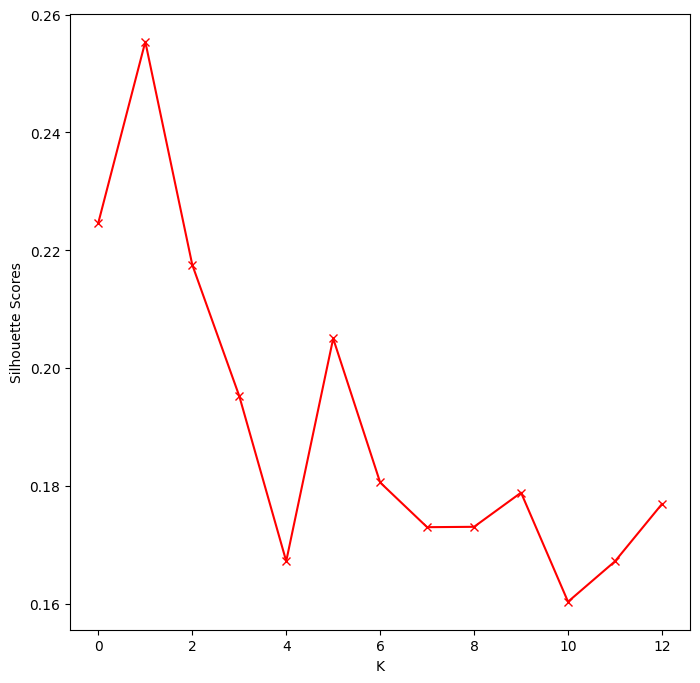

In [262]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores_pca10, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

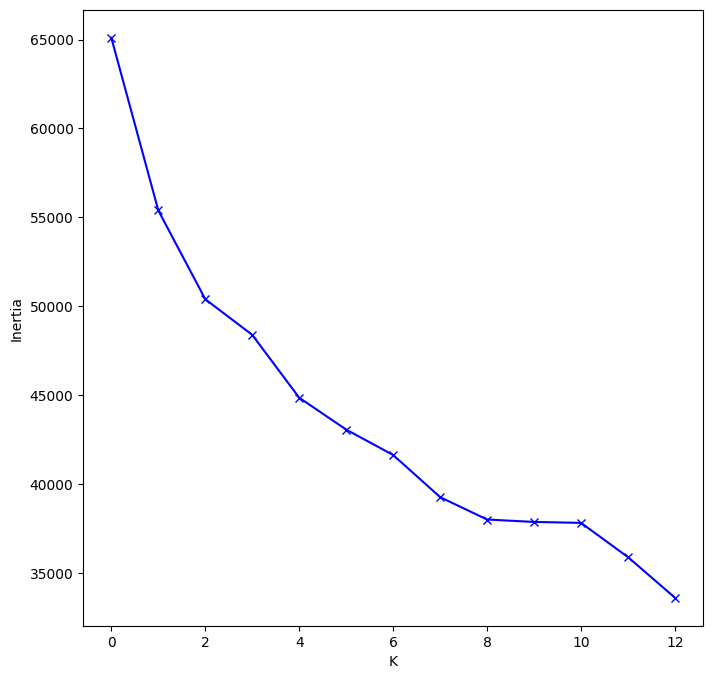

In [263]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances_pca15, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

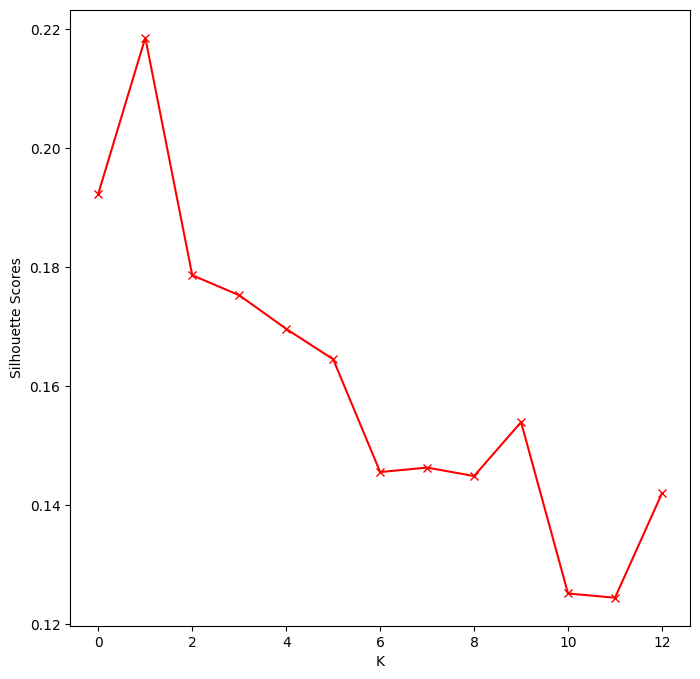

In [264]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores_pca15, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

In [270]:
kmeans_model_pca5 = KMeans(n_clusters=5, n_init='auto')
y_pca5 = kmeans_model_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
print(silhouette_score(df_marketing_campaign_num_scaled_pca5,y_pca5))

0.2496882368613108


In [272]:
kmeans_model_pca10 = KMeans(n_clusters=4, n_init='auto')
y_pca10 = kmeans_model_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
print(silhouette_score(df_marketing_campaign_num_scaled_pca10,y_pca10))

0.21752416750092393


In [275]:
kmeans_model_pca15 = KMeans(n_clusters=5, n_init='auto')
y_pca15 = kmeans_model_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)
print(silhouette_score(df_marketing_campaign_num_scaled_pca15,y_pca15))

0.18535382295452552


In [276]:
df_marketing_campaign['kmeans_pca5'] = y_pca5
df_marketing_campaign['kmeans_pca10'] = y_pca10
df_marketing_campaign['kmeans_pca15'] = y_pca15

kmeans_pca5


4    613
0    600
3    382
2    318
1    284
Name: kmeans_pca5, dtype: int64


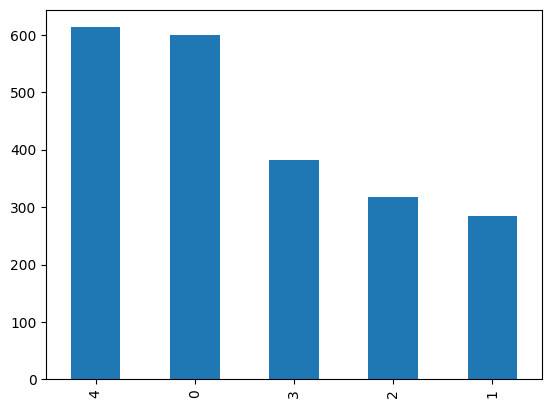



kmeans_pca10


1    640
3    632
2    608
0    317
Name: kmeans_pca10, dtype: int64


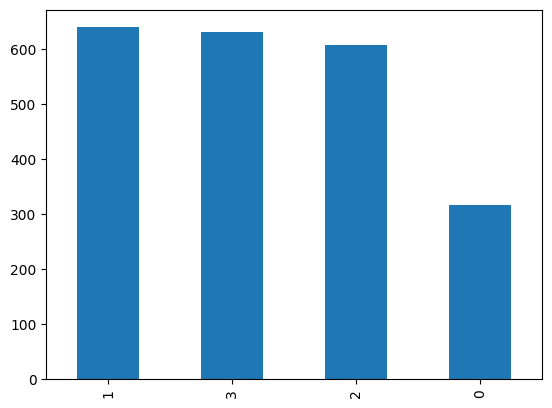



kmeans_pca15


3    630
1    606
0    587
2    310
4     64
Name: kmeans_pca15, dtype: int64


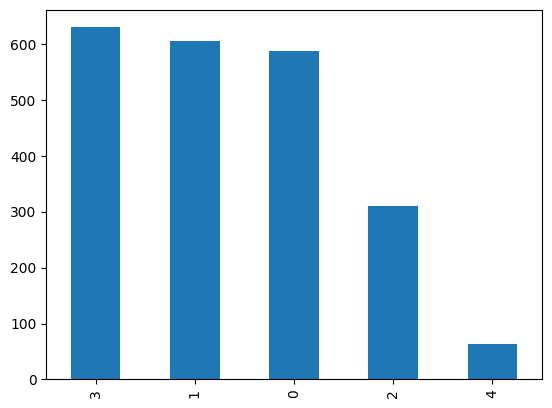

In [277]:
print('kmeans_pca5')
print('\n')
print(df_marketing_campaign['kmeans_pca5'].value_counts())
df_marketing_campaign['kmeans_pca5'].value_counts().plot(kind='bar')
plt.show()
print('\n')

print('kmeans_pca10')
print('\n')
print(df_marketing_campaign['kmeans_pca10'].value_counts())
df_marketing_campaign['kmeans_pca10'].value_counts().plot(kind='bar')
plt.show()
print('\n')

print('kmeans_pca15')
print('\n')
print(df_marketing_campaign['kmeans_pca15'].value_counts())
df_marketing_campaign['kmeans_pca15'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## Without PCA

In [279]:
sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k:
  kmeans_model = KMeans(n_clusters=_, n_init='auto')
  y = kmeans_model.fit_predict(df_marketing_campaign_num_scaled)
  sum_of_squared_distances.append(kmeans_model.inertia_)
  silhouette_scores.append(silhouette_score(df_marketing_campaign_num_scaled, y))
  

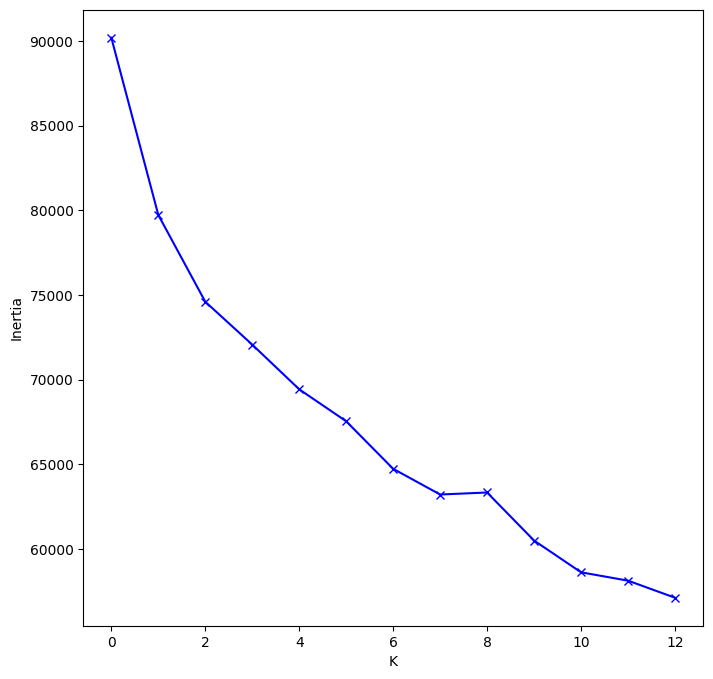

In [280]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

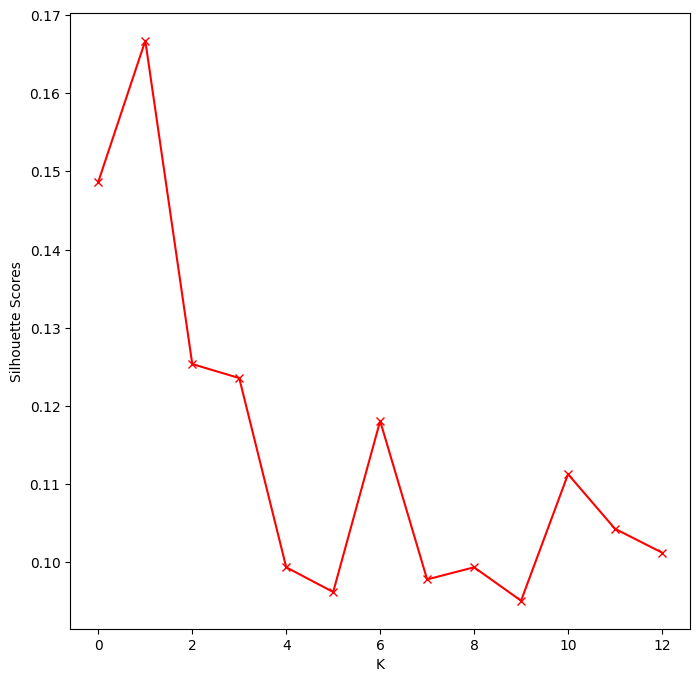

In [281]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

In [284]:
kmeans_model = KMeans(n_clusters=6, n_init='auto')
y = kmeans_model.fit_predict(df_marketing_campaign_num_scaled)
print(silhouette_score(df_marketing_campaign_num_scaled,y))

0.10064394881655526


In [141]:
df_marketing_campaign['kmeans'] = y

kmeans


2    650
0    601
3    480
1    466
Name: kmeans, dtype: int64


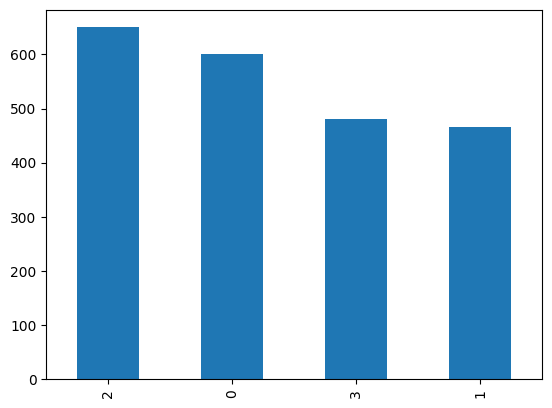

In [142]:
print('kmeans')
print('\n')
print(df_marketing_campaign['kmeans'].value_counts())
df_marketing_campaign['kmeans'].value_counts().plot(kind='bar')
plt.show()
print('\n')

# Agglomerative Clustering

## 5 PCA

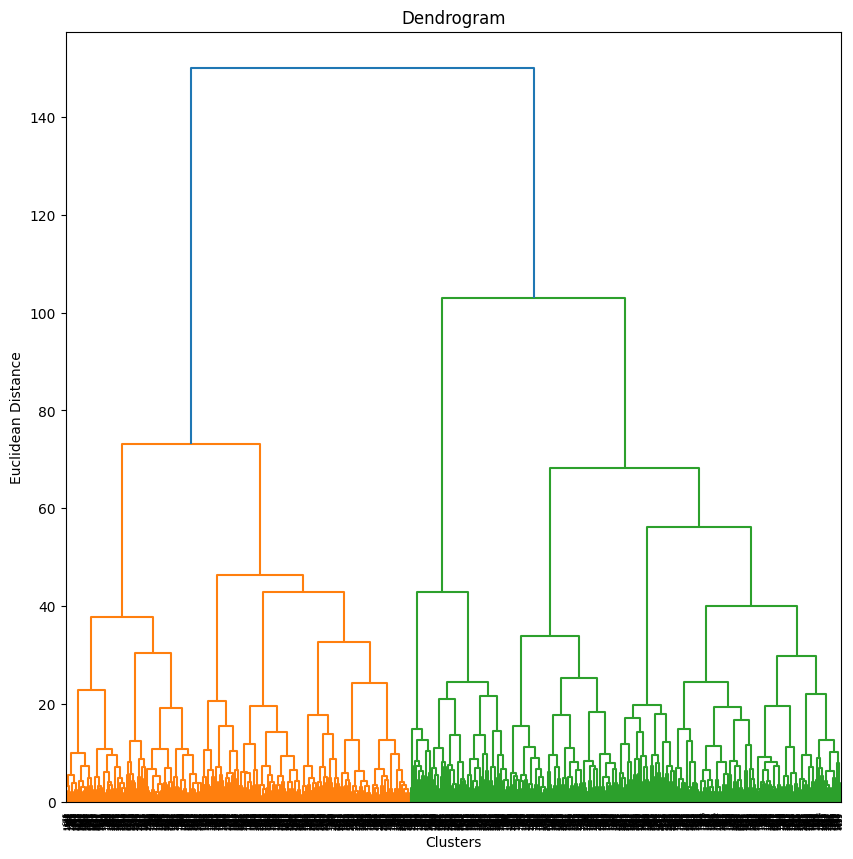

In [143]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca5, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [148]:
agglomerative_model_c2_pca5 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca5 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c6_pca5 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
# agglomerative_model_c5_pca5 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

y_c2_pca5 = agglomerative_model_c2_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c3_pca5 = agglomerative_model_c3_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c6_pca5 = agglomerative_model_c6_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
# y_c5_pca5 = agglomerative_model_c5_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c2_pca5)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c3_pca5)}')
print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c6_pca5)}')
# print(f'5 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c5_pca5)}')

df_marketing_campaign['ac_pca5'] = y_c6_pca5

2 clusters: 0.24151266230921176
3 clusters: 0.23037069066417412
4 clusters: 0.1671719894033738


ac_pca5


0    589
1    470
3    389
4    307
2    282
5    160
Name: ac_pca5, dtype: int64


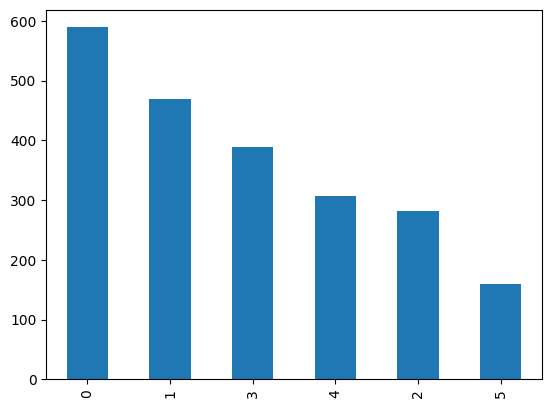

In [149]:
print('ac_pca5')
print('\n')
print(df_marketing_campaign['ac_pca5'].value_counts())
df_marketing_campaign['ac_pca5'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## 10 PCA

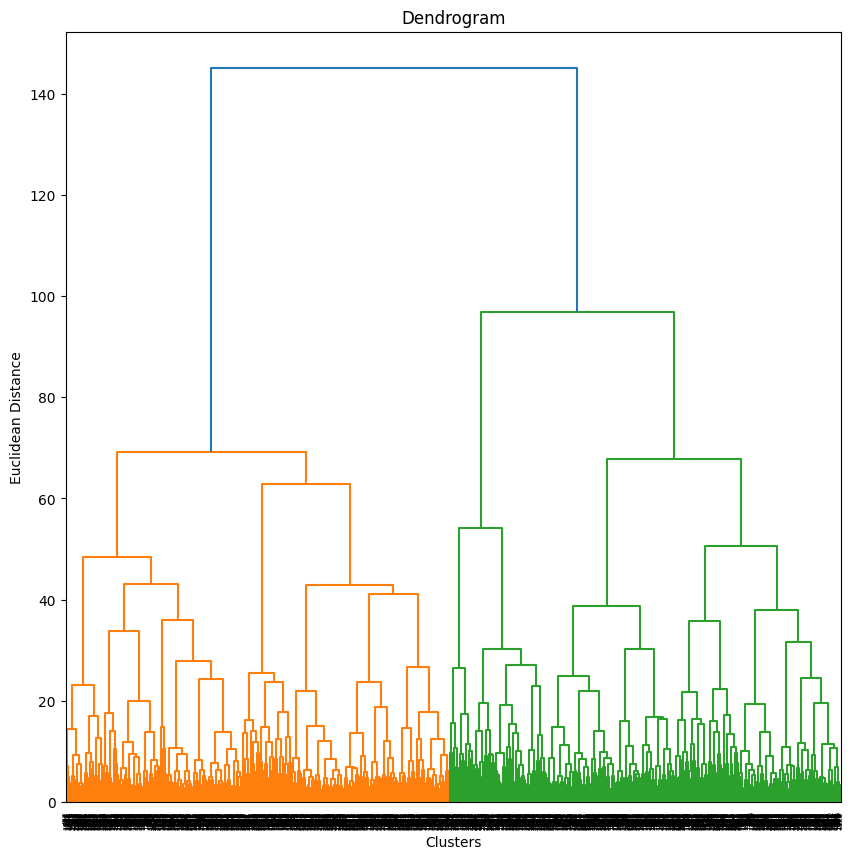

In [150]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca10, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [151]:
agglomerative_model_c2_pca10 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca10 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c8_pca10 = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
# agglomerative_model_c10_pca10 = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')

y_c2_pca10 = agglomerative_model_c2_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
y_c3_pca10 = agglomerative_model_c3_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
y_c8_pca10 = agglomerative_model_c8_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
# y_c10_pca10 = agglomerative_model_c10_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c2_pca10)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c3_pca10)}')
print(f'8 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c8_pca10)}')
# print(f'10 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c10_pca10)}')

df_marketing_campaign['ac_pca10'] = y_c8_pca10

2 clusters: 0.1760975155049192
3 clusters: 0.15430388318550062
8 clusters: 0.10116329631826845


ac_pca10


0    500
2    449
1    362
4    290
7    210
3    179
5    140
6     67
Name: ac_pca10, dtype: int64


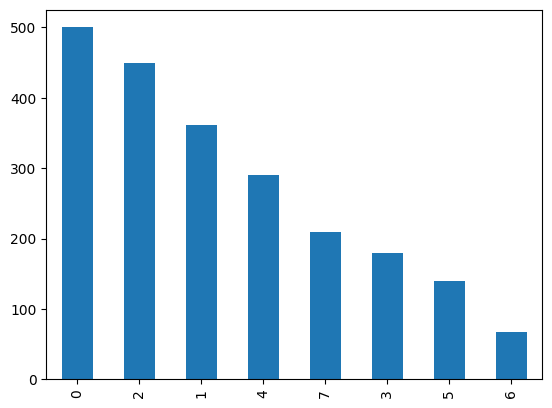

In [152]:
print('ac_pca10')
print('\n')
print(df_marketing_campaign['ac_pca10'].value_counts())
df_marketing_campaign['ac_pca10'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## 15 PCA

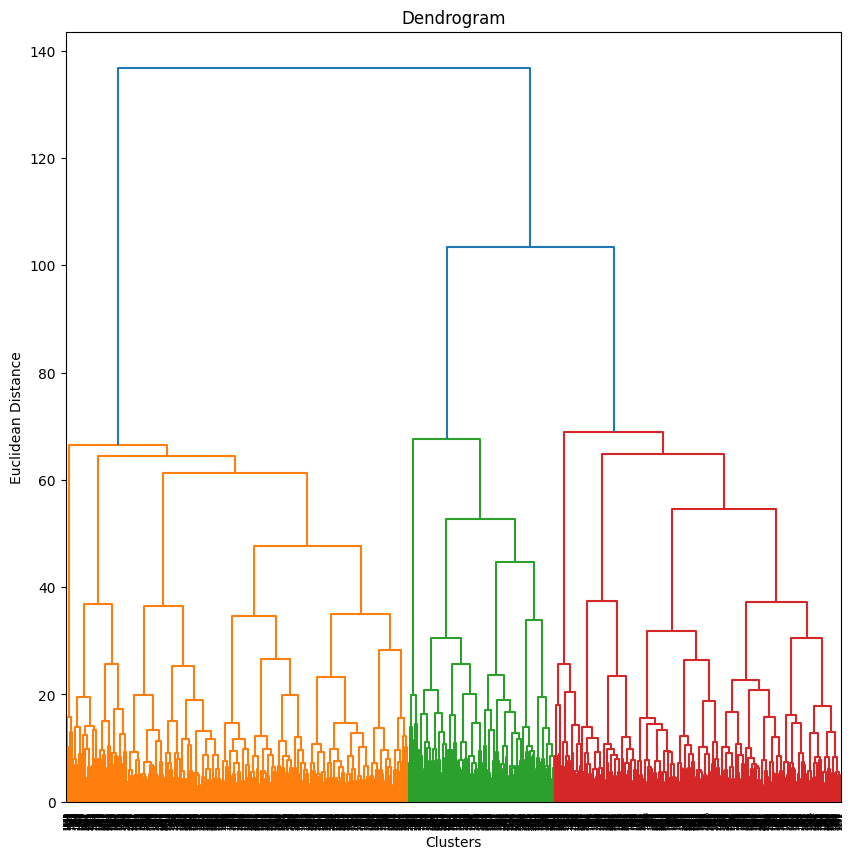

In [153]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca15, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [155]:
agglomerative_model_c2_pca15 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca15 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c9_pca15 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c2_pca15 = agglomerative_model_c2_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)
y_c3_pca15 = agglomerative_model_c3_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)
y_c9_pca15 = agglomerative_model_c9_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca15,y_c2_pca15)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca15,y_c3_pca15)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca15,y_c9_pca15)}')

df_marketing_campaign['ac_pca15'] = y_c9_pca15

2 clusters: 0.13703733622836706
3 clusters: 0.1195108610208746
9 clusters: 0.11673662119946322


ac_pca15


0    578
2    530
1    384
8    267
6    157
3    156
7     75
4     30
5     20
Name: ac_pca15, dtype: int64


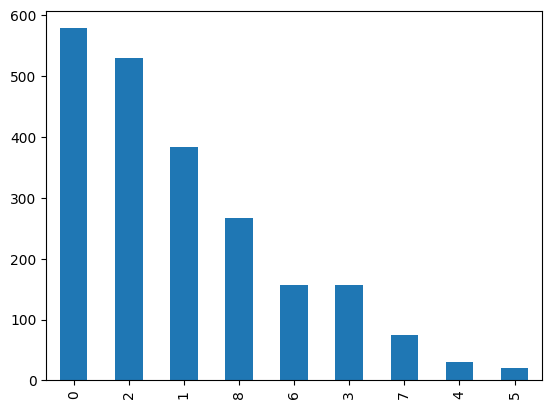

In [156]:
print('ac_pca15')
print('\n')
print(df_marketing_campaign['ac_pca15'].value_counts())
df_marketing_campaign['ac_pca15'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## Without PCA

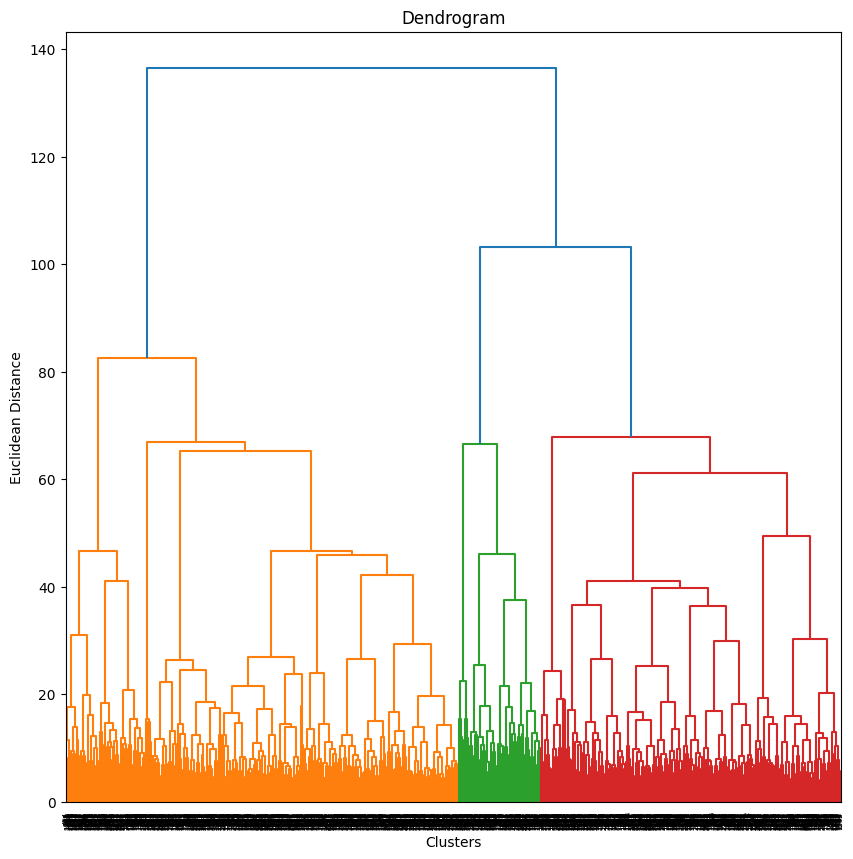

In [157]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [158]:
agglomerative_model_c3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_model_c9 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c4 = agglomerative_model_c4.fit_predict(df_marketing_campaign_num_scaled)
y_c3 = agglomerative_model_c3.fit_predict(df_marketing_campaign_num_scaled)
y_c9 = agglomerative_model_c9.fit_predict(df_marketing_campaign_num_scaled)

print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c4)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c3)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c9)}')

df_marketing_campaign['ac'] = y_c3


4 clusters: 0.11370354397416364
3 clusters: 0.10588893848016258
9 clusters: 0.08414682234994565


ac


0    1115
1     850
2     232
Name: ac, dtype: int64


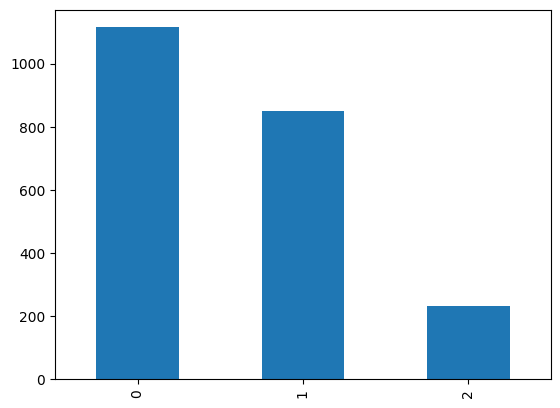

In [159]:
print('ac')
print('\n')
print(df_marketing_campaign['ac'].value_counts())
df_marketing_campaign['ac'].value_counts().plot(kind='bar')
plt.show()
print('\n')

# DBSCAN

## 5 PCA

In [160]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca5)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca5)

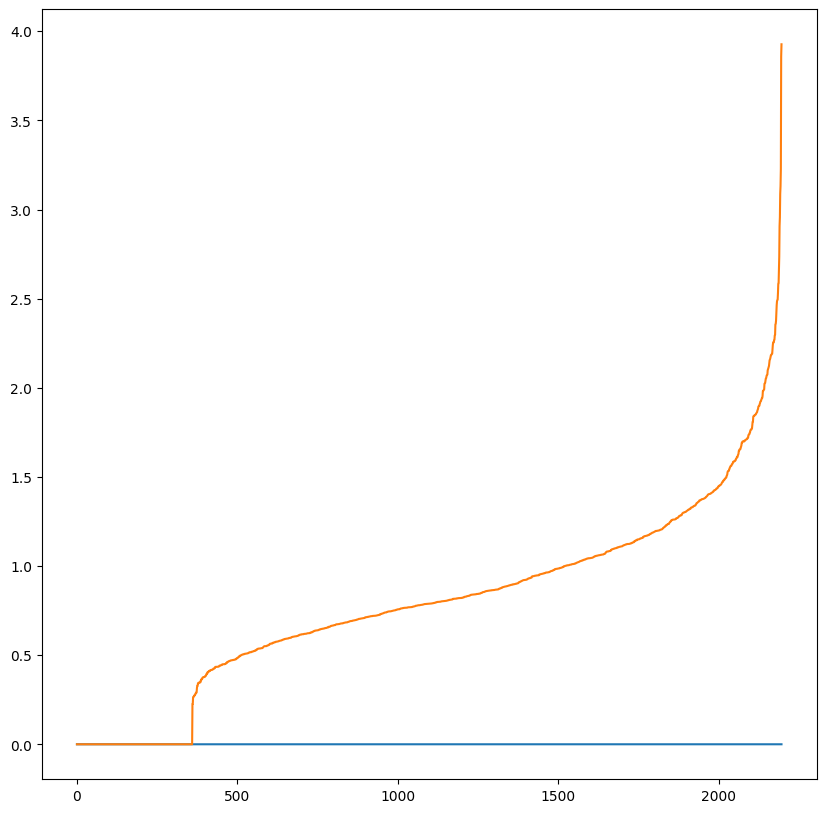

In [161]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [203]:
eps_values = np.arange(1, 2, 0.1)
min_samples = np.arange(2,10)

In [204]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca5)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca5,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [205]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [206]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

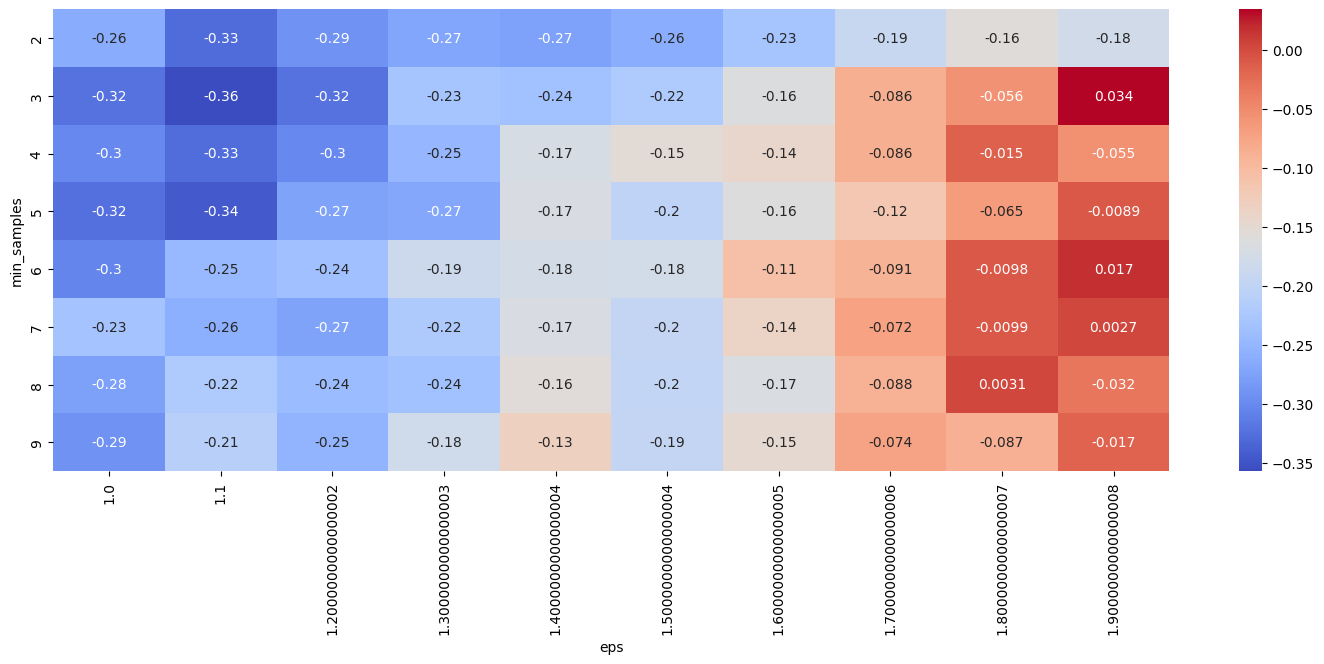

In [207]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

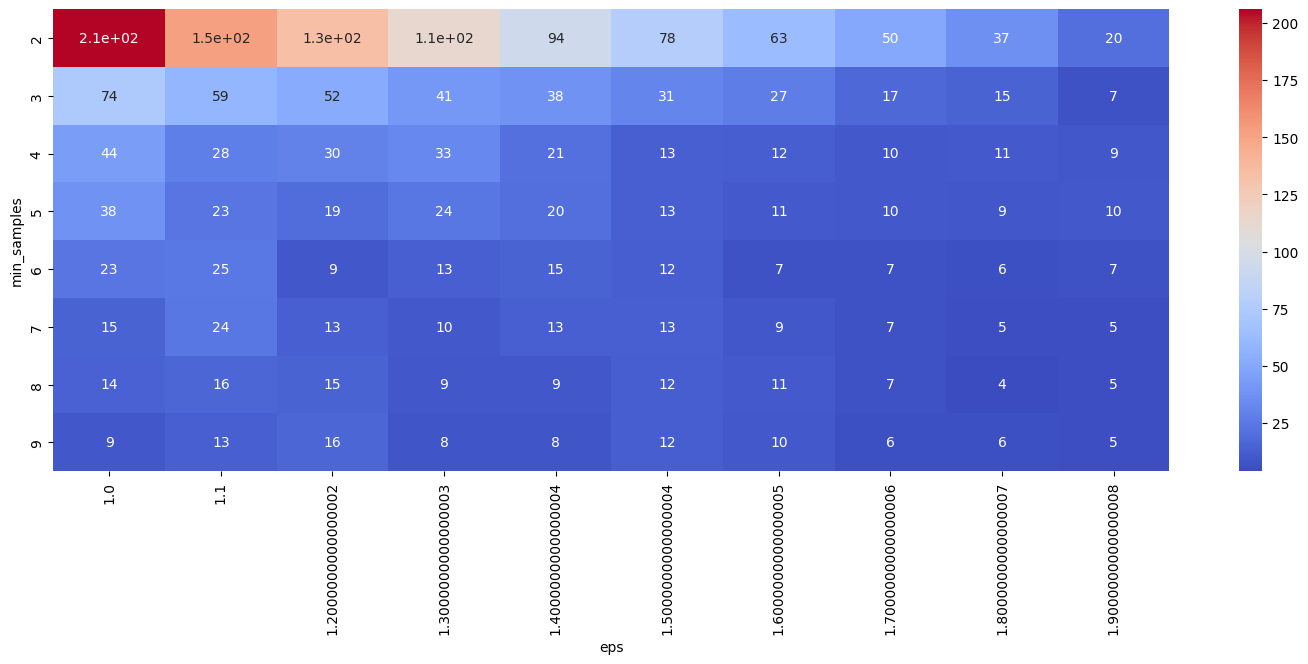

In [208]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [209]:
dbscan_model = DBSCAN(eps=1.9, min_samples=3)
y_dbscan_pca5 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca5)

print(silhouette_score(df_marketing_campaign_num_scaled_pca5, y_dbscan_pca5))
df_marketing_campaign['DBSCAN_pca5'] = y_dbscan_pca5

0.03425667097881833


DBSCAN_pca5


 0    2077
-1      95
 1      13
 4       3
 2       3
 3       3
 5       3
Name: DBSCAN_pca5, dtype: int64


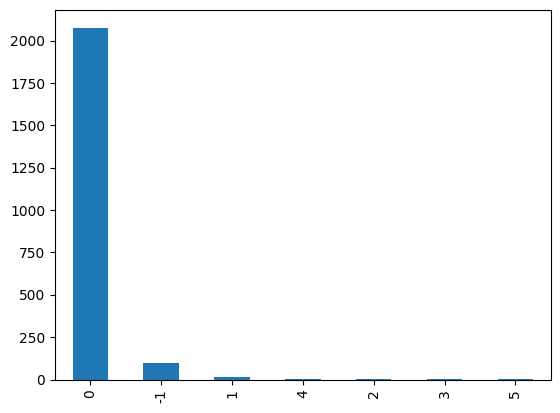

In [210]:
print('DBSCAN_pca5')
print('\n')
print(df_marketing_campaign['DBSCAN_pca5'].value_counts())
df_marketing_campaign['DBSCAN_pca5'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## 10 PCA

In [211]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca10)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca10)

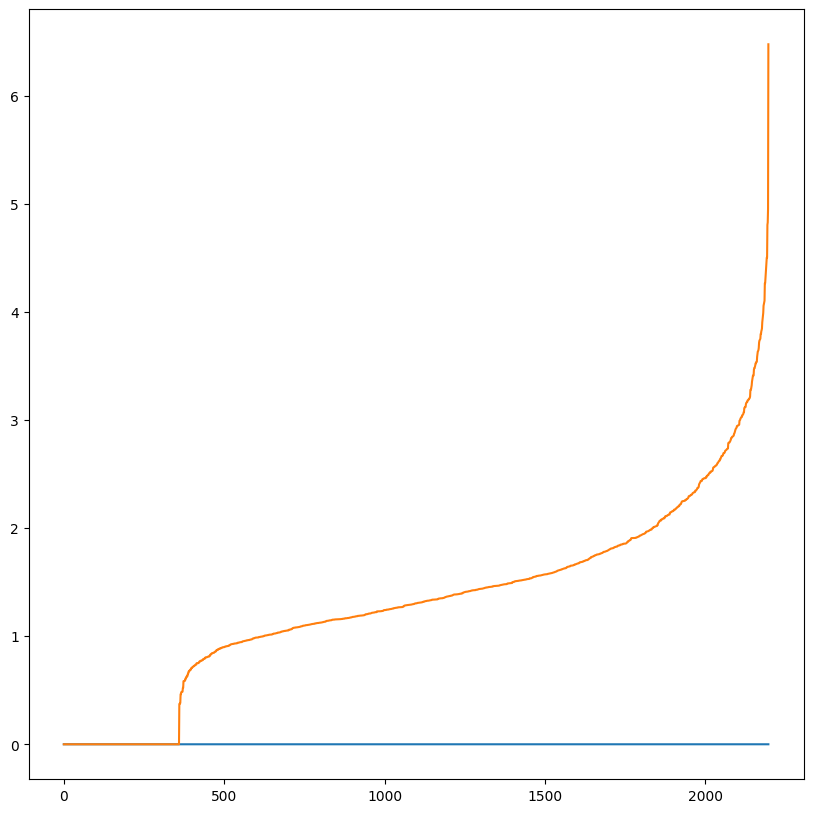

In [212]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [213]:
eps_values = np.arange(1.5, 4, 0.1)
min_samples = np.arange(2,10)

In [214]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca10)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca10,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [215]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [216]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

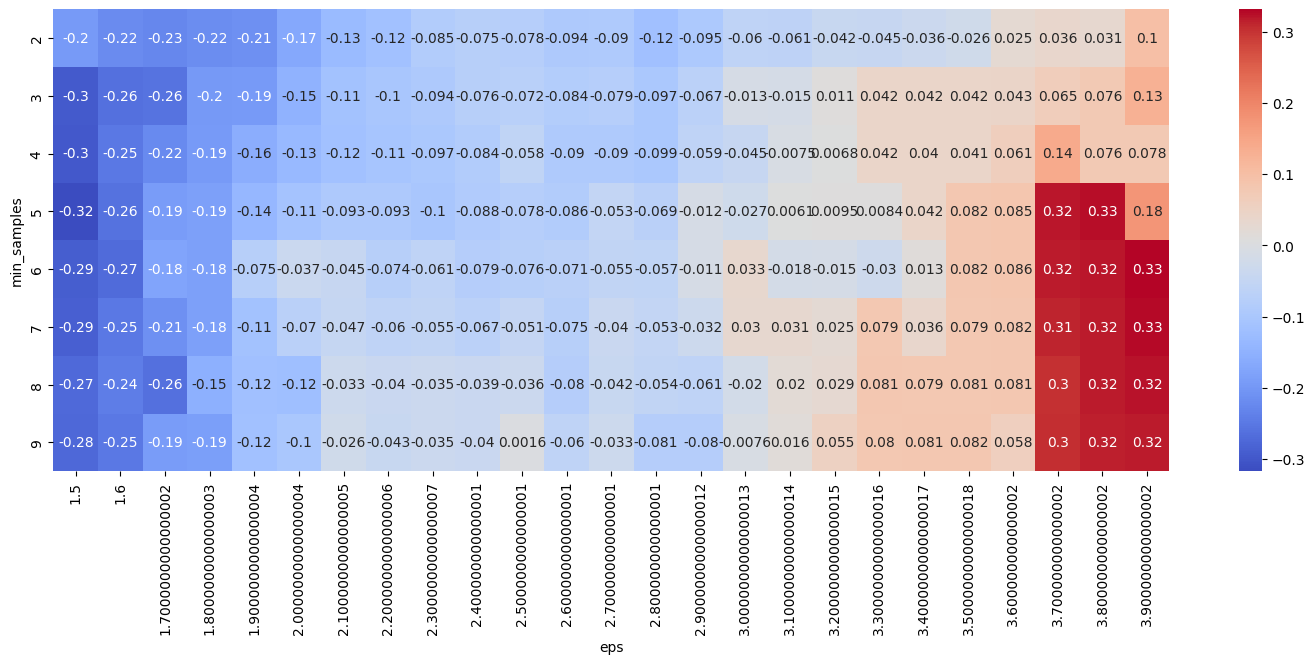

In [217]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

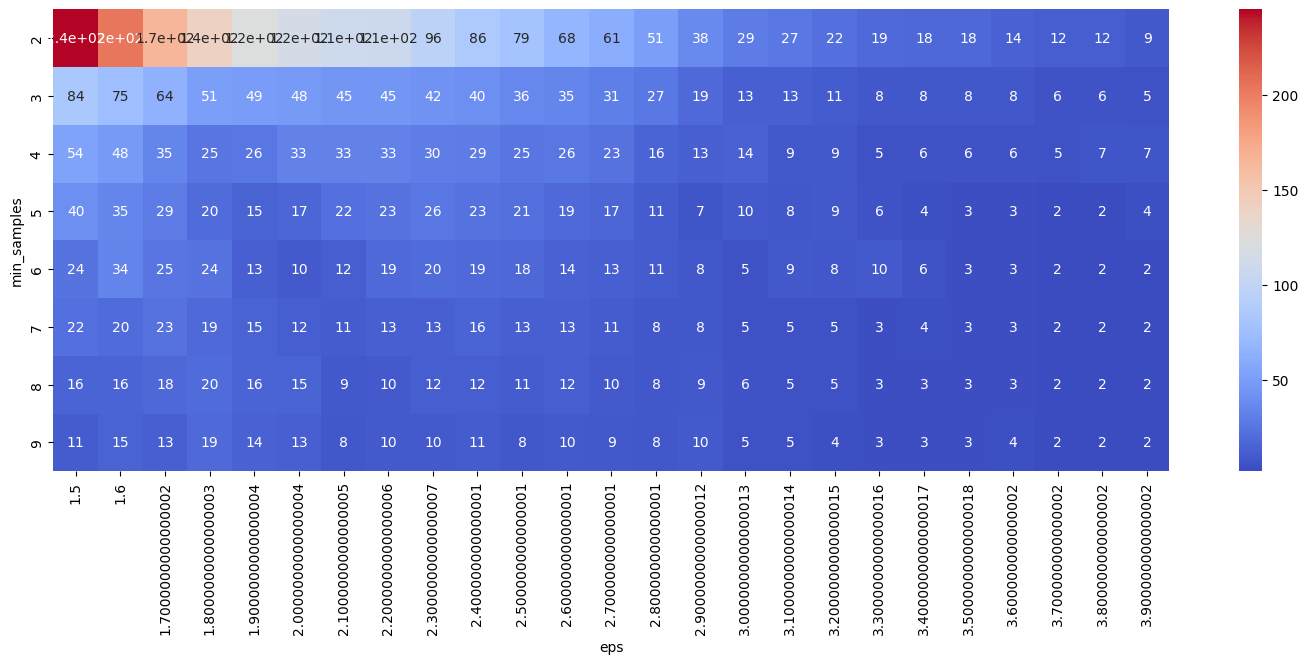

In [218]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [219]:
dbscan_model = DBSCAN(eps=3.9, min_samples=5)
y_dbscan_pca10 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca10)

print(silhouette_score(df_marketing_campaign_num_scaled_pca10, y_dbscan_pca10))
df_marketing_campaign['DBSCAN_pca10'] = y_dbscan_pca10

0.1767755939504988


DBSCAN_pca10


 0    2142
-1      46
 1       5
 2       4
Name: DBSCAN_pca10, dtype: int64


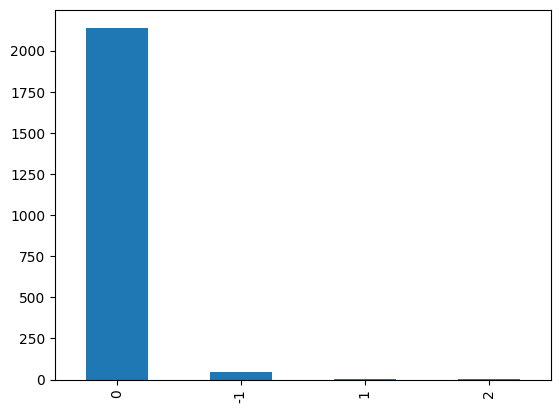

In [220]:
print('DBSCAN_pca10')
print('\n')
print(df_marketing_campaign['DBSCAN_pca10'].value_counts())
df_marketing_campaign['DBSCAN_pca10'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## 15 PCA

In [221]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca15)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca15)

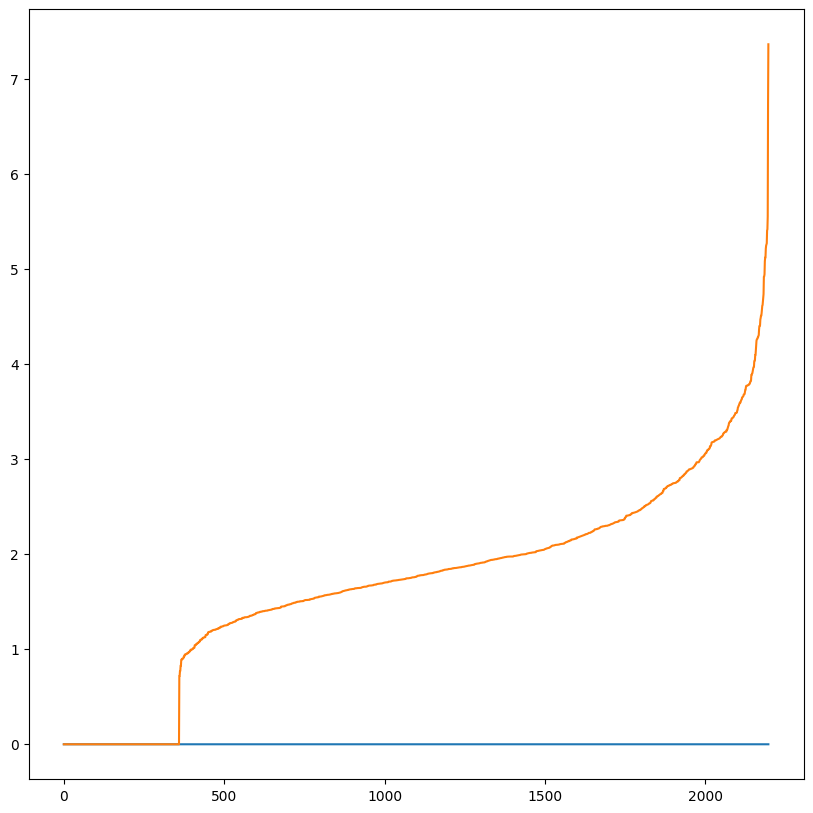

In [222]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [223]:
eps_values = np.arange(2.5, 4, 0.1)
min_samples = np.arange(2,10)

In [224]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca15)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca15,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [225]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [226]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

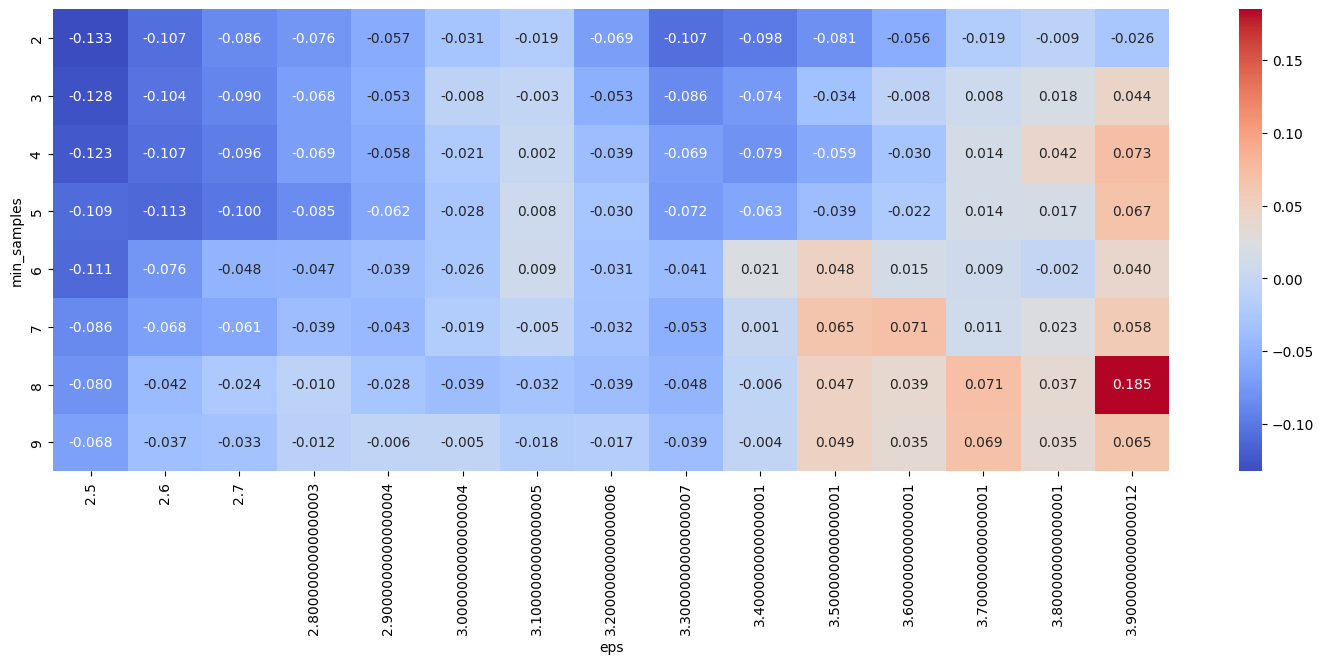

In [227]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, fmt='.3f', annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

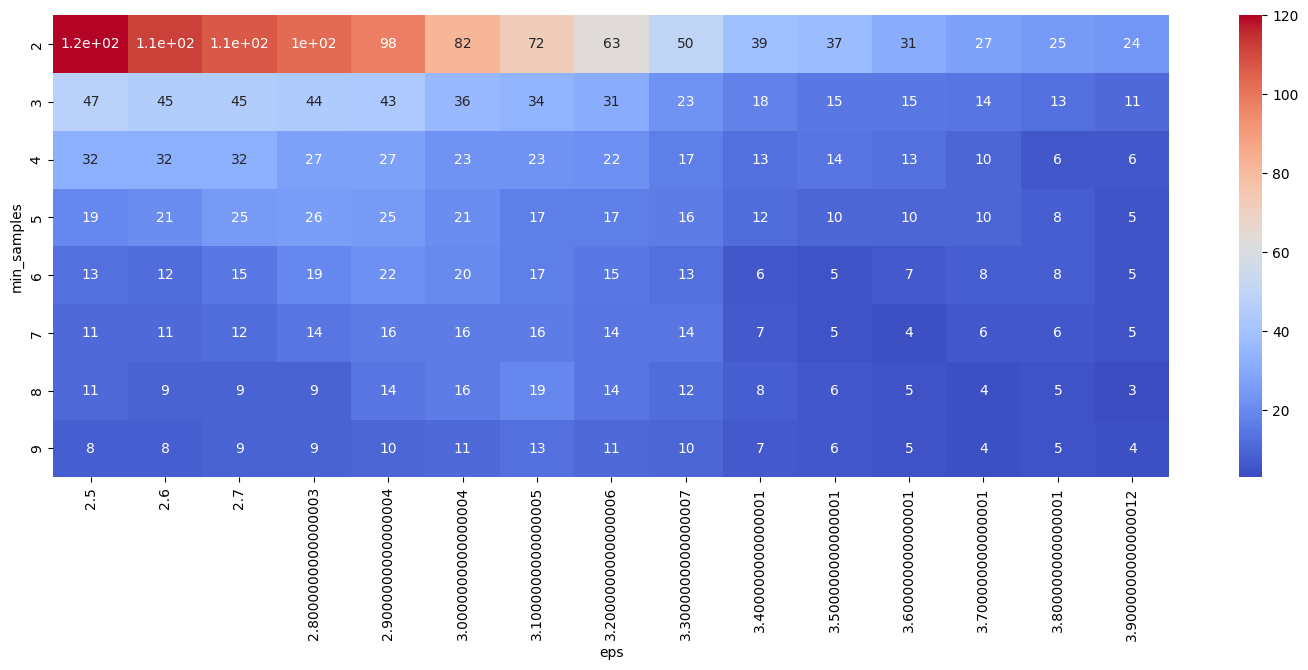

In [228]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [229]:
dbscan_model = DBSCAN(eps=3.9, min_samples=8)
y_dbscan_pca15 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca15)

print(silhouette_score(df_marketing_campaign_num_scaled_pca15, y_dbscan_pca15))
df_marketing_campaign['DBSCAN_pca15'] = y_dbscan_pca15

0.1848390511103661


DBSCAN_pca15


 0    1985
-1     153
 1      59
Name: DBSCAN_pca15, dtype: int64


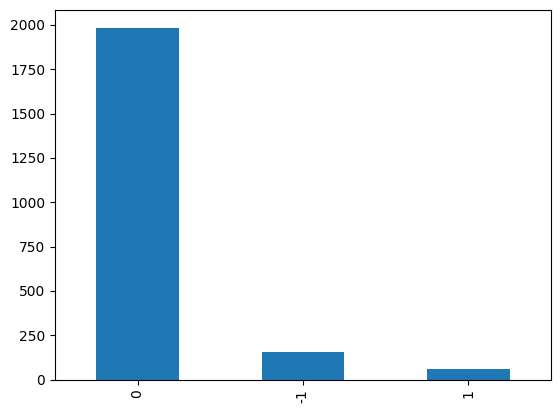

In [230]:
print('DBSCAN_pca15')
print('\n')
print(df_marketing_campaign['DBSCAN_pca15'].value_counts())
df_marketing_campaign['DBSCAN_pca15'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## Without PCA

In [231]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled)

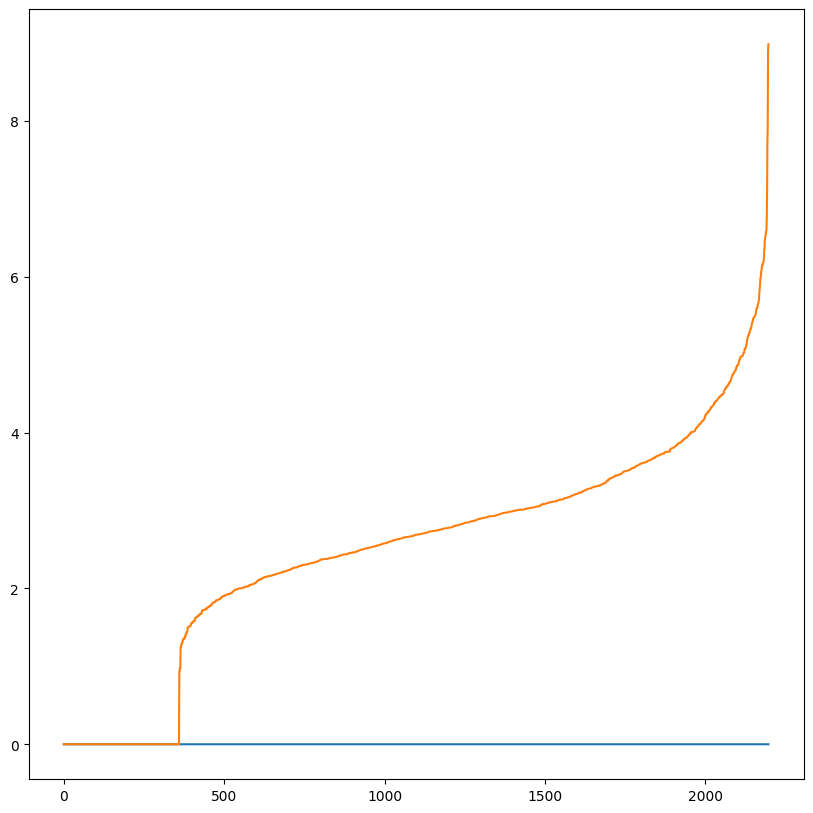

In [232]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [233]:
eps_values = np.arange(3.5, 6, 0.1)
min_samples = np.arange(2,10)

In [234]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [235]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [236]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

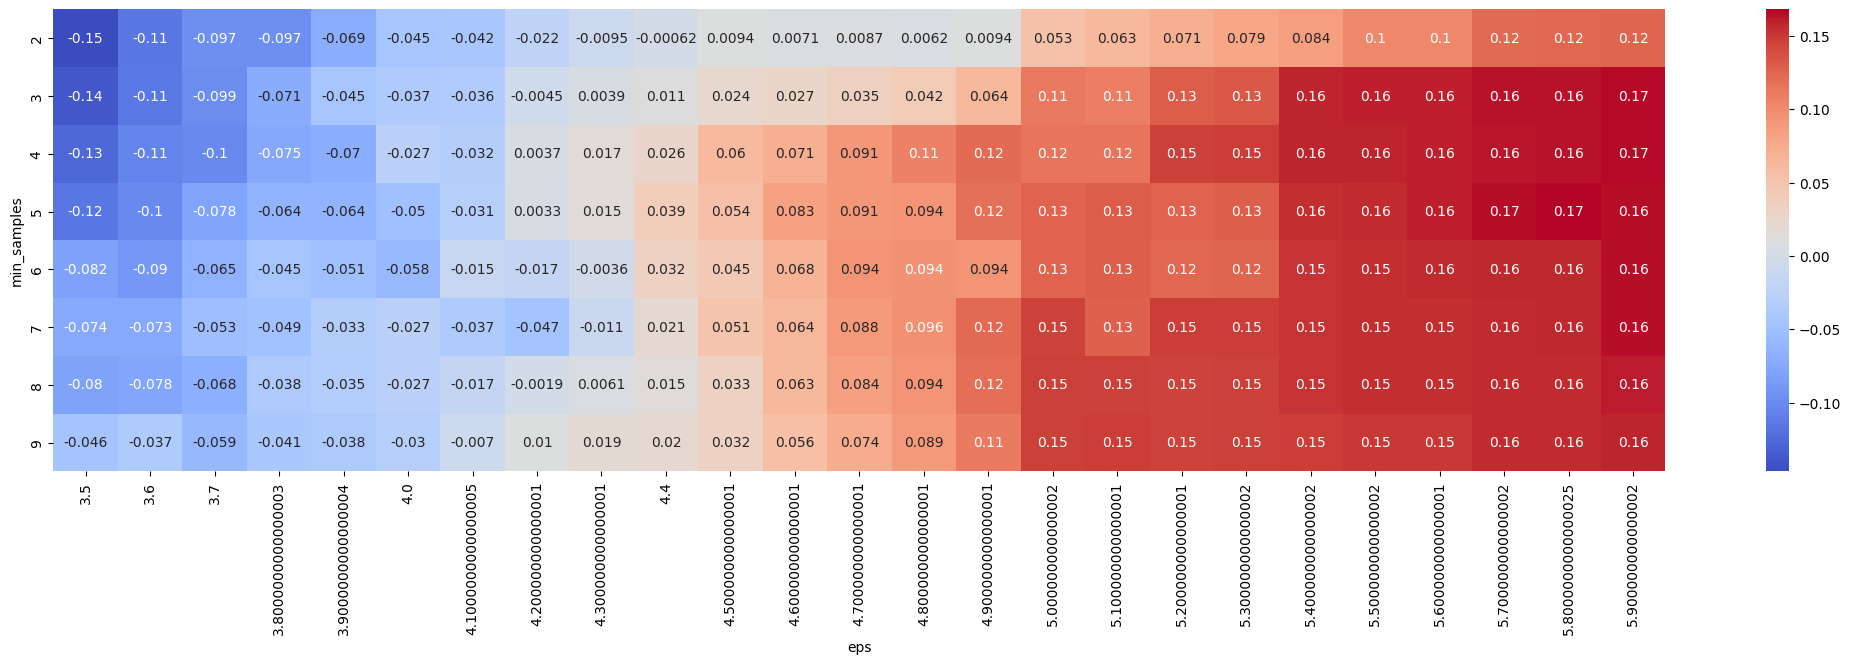

In [237]:
fig, ax = plt.subplots(figsize=(26,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

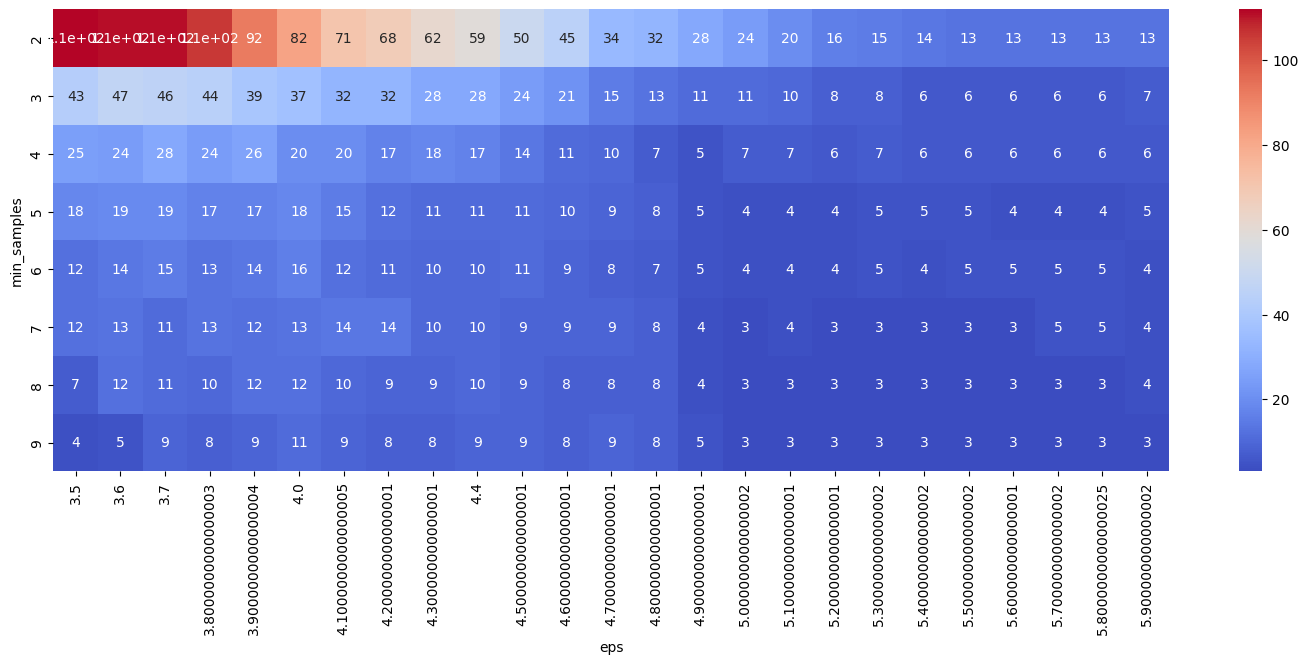

In [238]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [241]:
dbscan_model = DBSCAN(eps=5.3, min_samples=3)
y_dbscan = dbscan_model.fit_predict(df_marketing_campaign_num_scaled)

print(silhouette_score(df_marketing_campaign_num_scaled, y_dbscan))
df_marketing_campaign['DBSCAN'] = y_dbscan

0.13293130826806093


DBSCAN


 0    2039
-1      73
 1      60
 2       8
 4       5
 5       5
 3       4
 6       3
Name: DBSCAN, dtype: int64


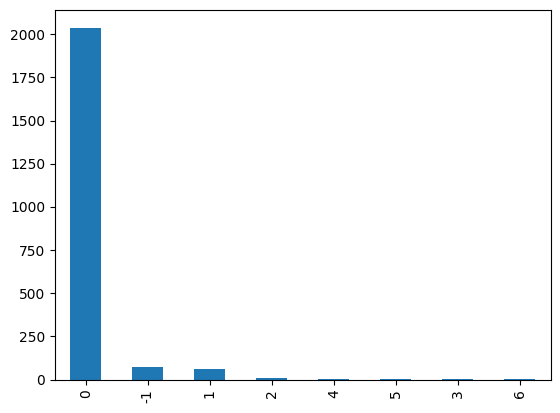

In [242]:
print('DBSCAN')
print('\n')
print(df_marketing_campaign['DBSCAN'].value_counts())
df_marketing_campaign['DBSCAN'].value_counts().plot(kind='bar')
plt.show()
print('\n')

# EVALUATION

In [144]:
df_marketing_campaign.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age_customer_enrollment',
       'Education_int', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Dt_Customer_diff_days', 'MntTotal',
       'NumTotalPurchases', 'RatioTotalMntPurchases', 'RatioMntWines',
       'RatioMntFruits', 'RatioMntMeatProducts', 'RatioMntFishProducts',
       'RatioMntSweetProducts', 'RatioMntGoldProducts', 'AcceptedOfferAnyCmp',
       'AcceptedOfferTotalCmp', 'kmeans_pca5', 'kmeans_pca10', 'kmeans_pca15',
       'kmeans'],
      dtype='object')

In [278]:
df_marketing_campaign_num.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'age_customer_enrollment', 'Education_int', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Dt_Customer_diff_days', 'MntTotal', 'NumTotalPurchases',
       'RatioTotalMntPurchases', 'RatioMntWines', 'RatioMntFruits',
       'RatioMntMeatProducts', 'RatioMntFishProducts', 'RatioMntSweetProducts',
       'RatioMntGoldProducts', 'AcceptedOfferAnyCmp', 'AcceptedOfferTotalCmp',
       'kmeans_pca5', 'kmeans_pca10', 'kmeans_pca15', 'kmeans', 'ac_pca5',
       'ac_pca10', 'ac_pca15', 'ac', 'DBSCAN_pca5', 'DBSCAN_pca10',
       'DBSCAN_pca15', 'DBSCAN', 'RatioNumWebPurchases',
       'RatioNumCatalogPurchases', 'RatioNumStorePurchases',
       'RatioNumDealsPurchases'],
      dtype='ob

DBSCAN_pca10


 2    784
 1    513
 0    433
-1    221
 3    199
 4     51
Name: DBSCAN_pca10, dtype: int64


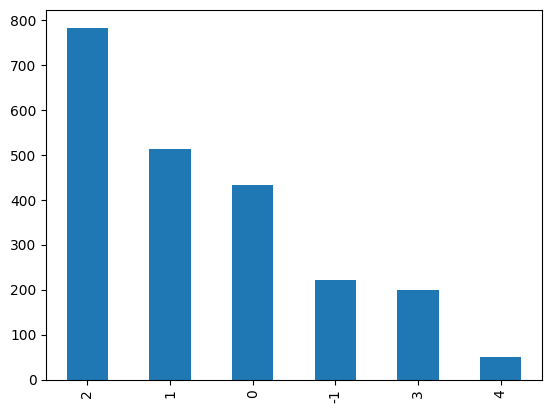

In [248]:
# df_marketing_campaign['DBSCAN_pca10'].value_counts()
print('DBSCAN_pca10')
print('\n')
print(df_marketing_campaign['DBSCAN_pca10'].value_counts())
df_marketing_campaign['DBSCAN_pca10'].value_counts().plot(kind='bar')
plt.show()
print('\n')

In [ ]:
sns.pairplot(data= df_marketing_campaign[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'age_customer_enrollment', 'Education_int', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Dt_Customer_diff_days', 'MntTotal', 'NumTotalPurchases',
       'RatioTotalMntPurchases', 'RatioMntWines', 'RatioMntFruits',
       'RatioMntMeatProducts', 'RatioMntFishProducts', 'RatioMntSweetProducts',
       'RatioMntGoldProducts', 'AcceptedOfferAnyCmp', 'AcceptedOfferTotalCmp',
       'kmeans_pca5', 'RatioNumWebPurchases',
       'RatioNumCatalogPurchases', 'RatioNumStorePurchases',
       'RatioNumDealsPurchases']], hue='kmeans_pca5', palette='coolwarm')

In [286]:
df_marketing_campaign['kmeans_pca5'].value_counts()

4    613
0    600
3    382
2    318
1    284
Name: kmeans_pca5, dtype: int64

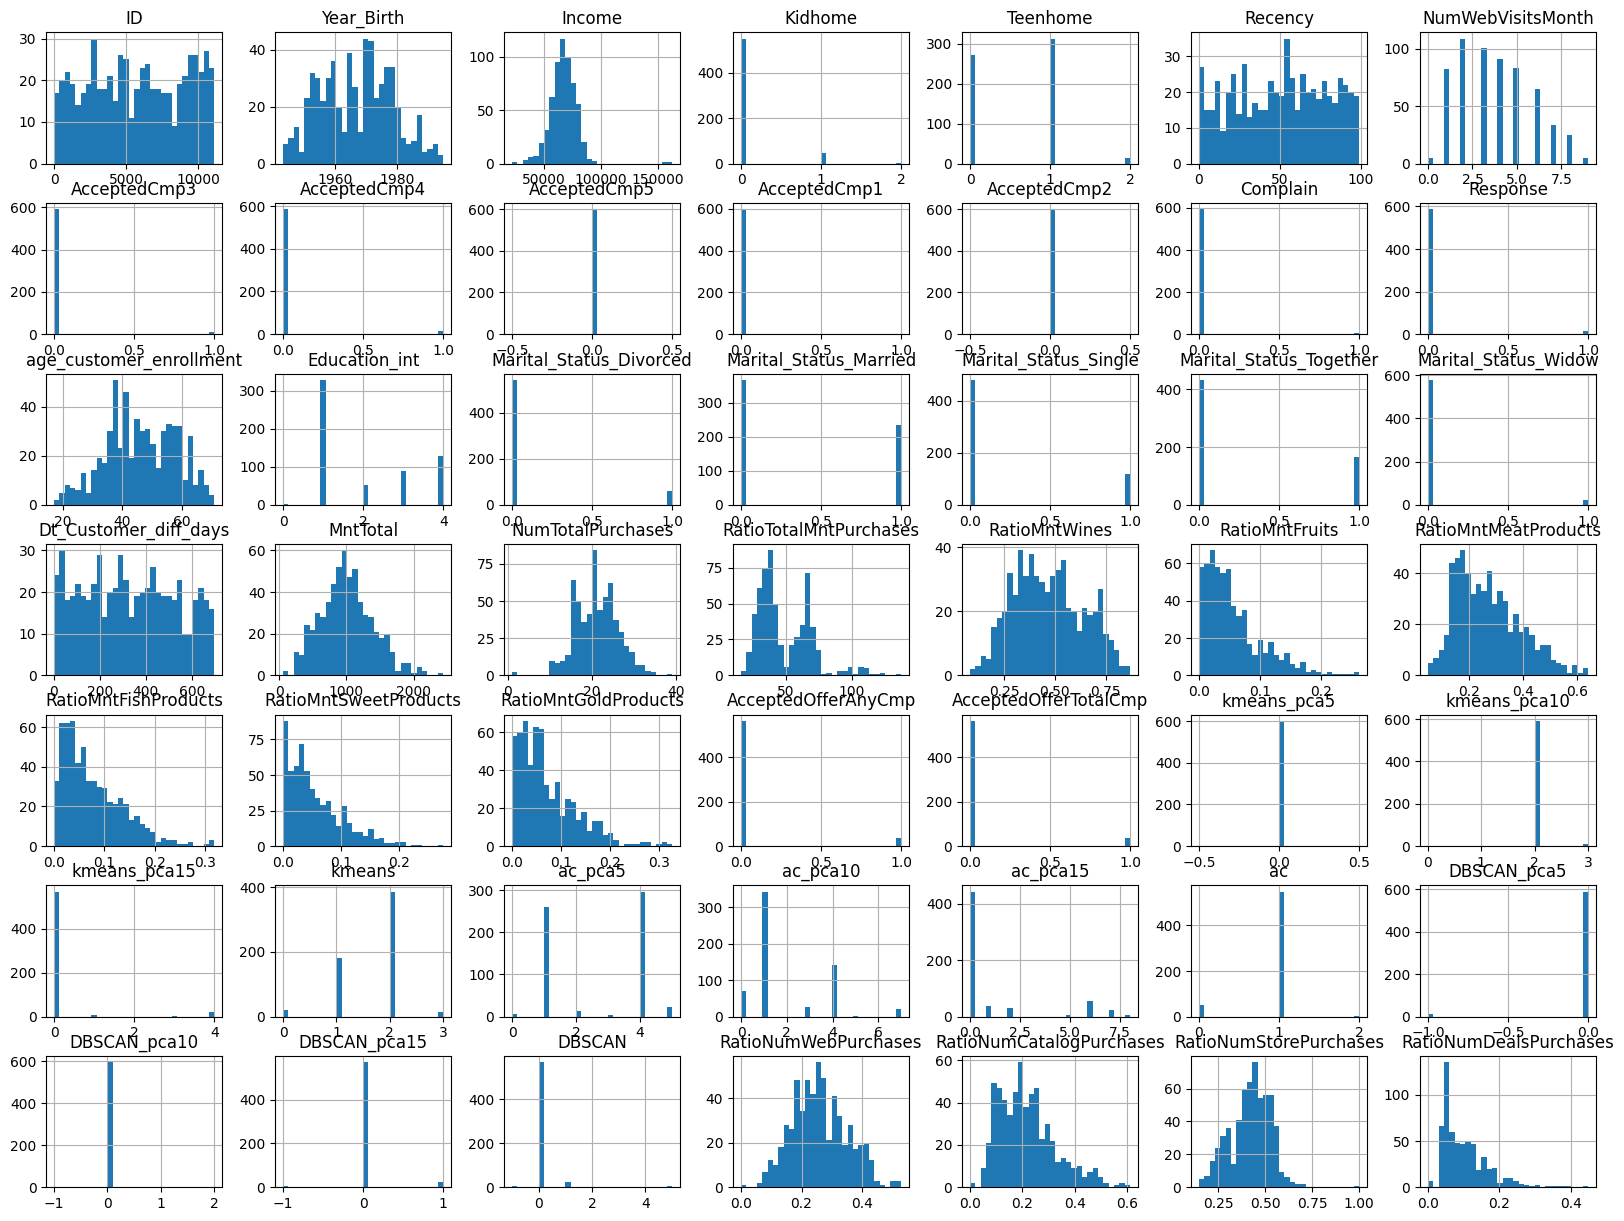

In [289]:
df_marketing_campaign[df_marketing_campaign['kmeans_pca5'] == 0].hist(bins=30, figsize=(20, 15))
plt.show()

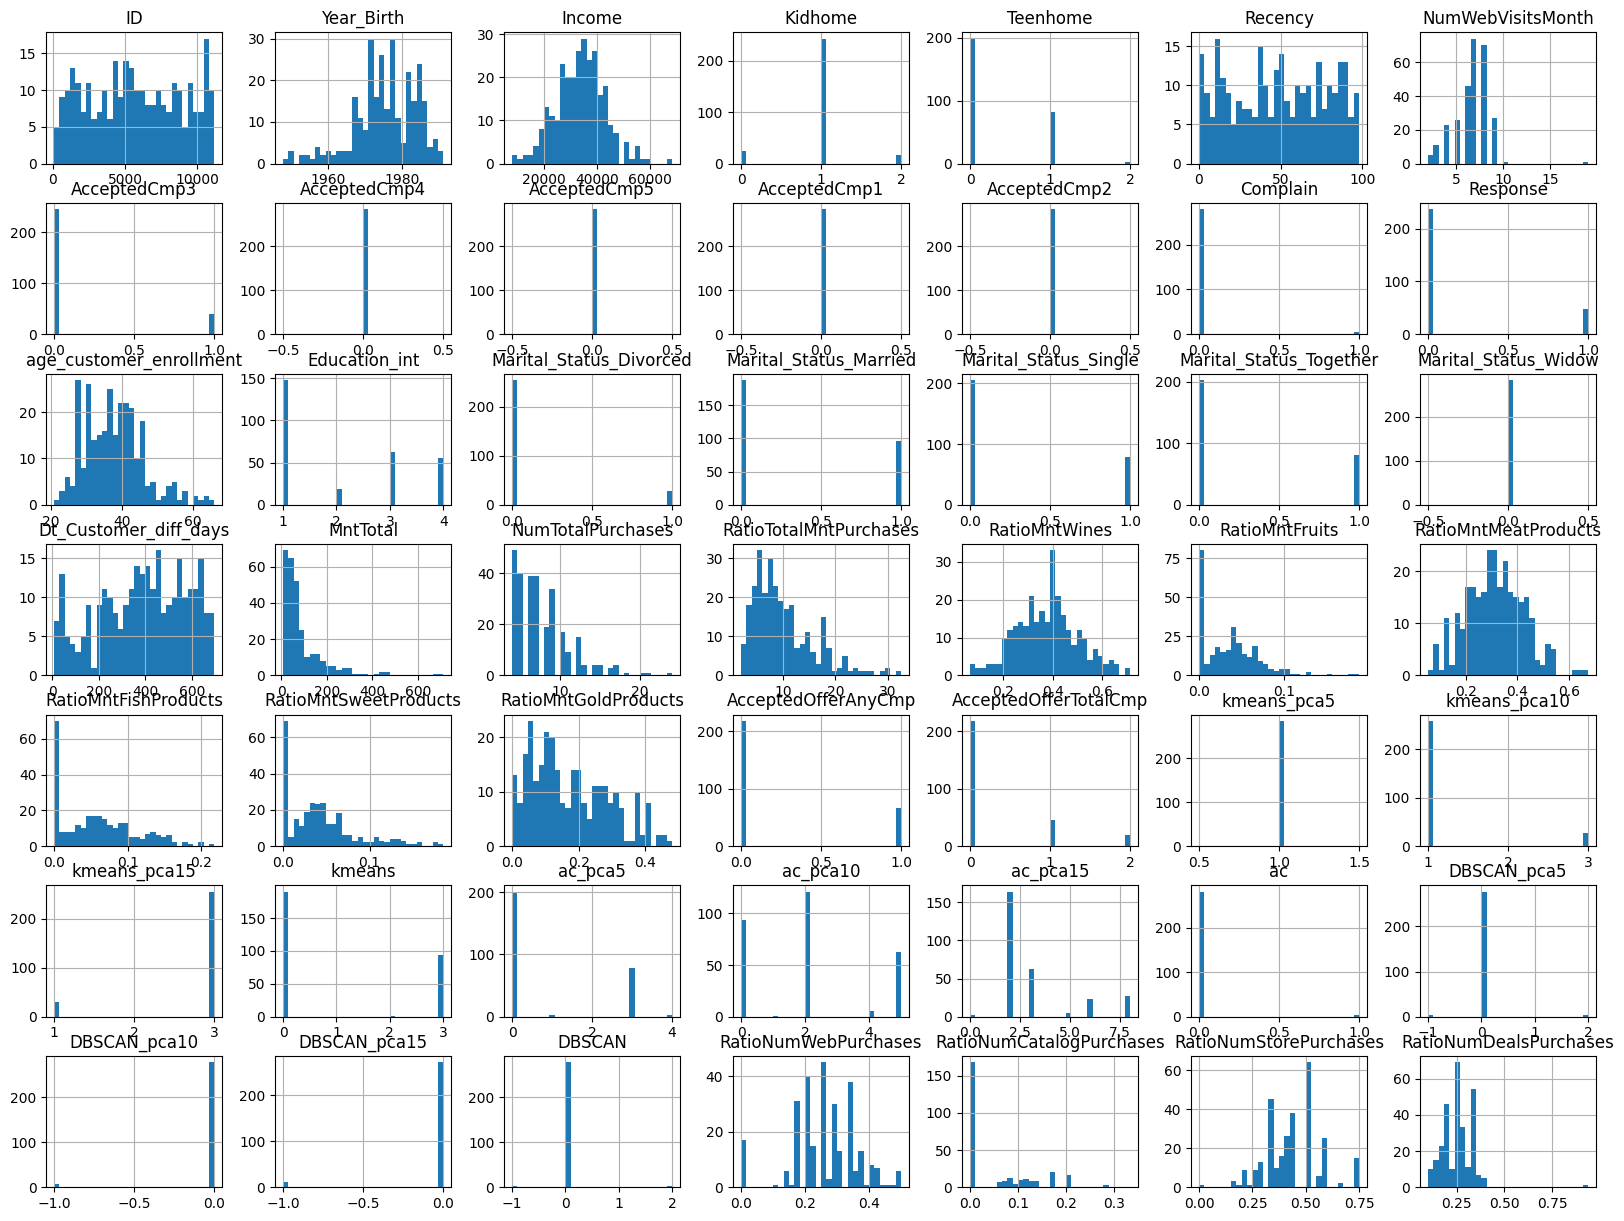

In [290]:
df_marketing_campaign[df_marketing_campaign['kmeans_pca5'] == 1].hist(bins=30, figsize=(20, 15))
plt.show()

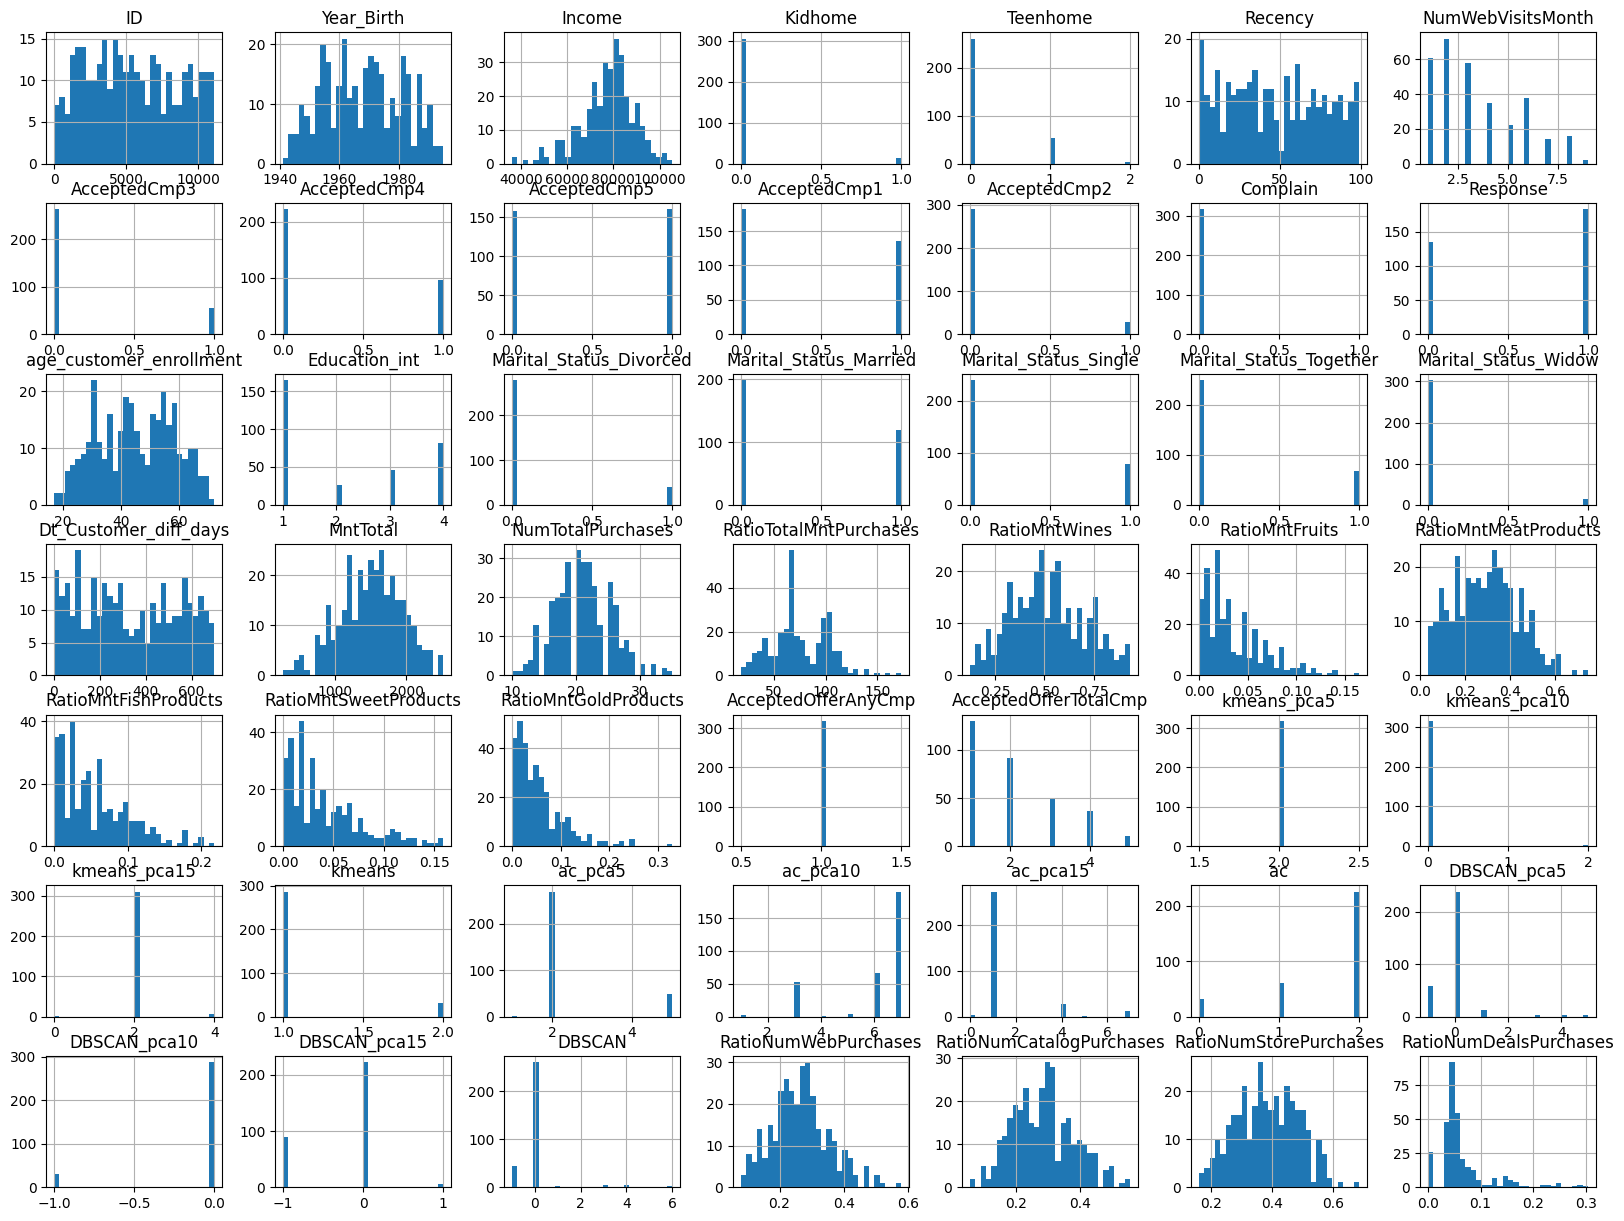

In [291]:
df_marketing_campaign[df_marketing_campaign['kmeans_pca5'] == 2].hist(bins=30, figsize=(20, 15))
plt.show()

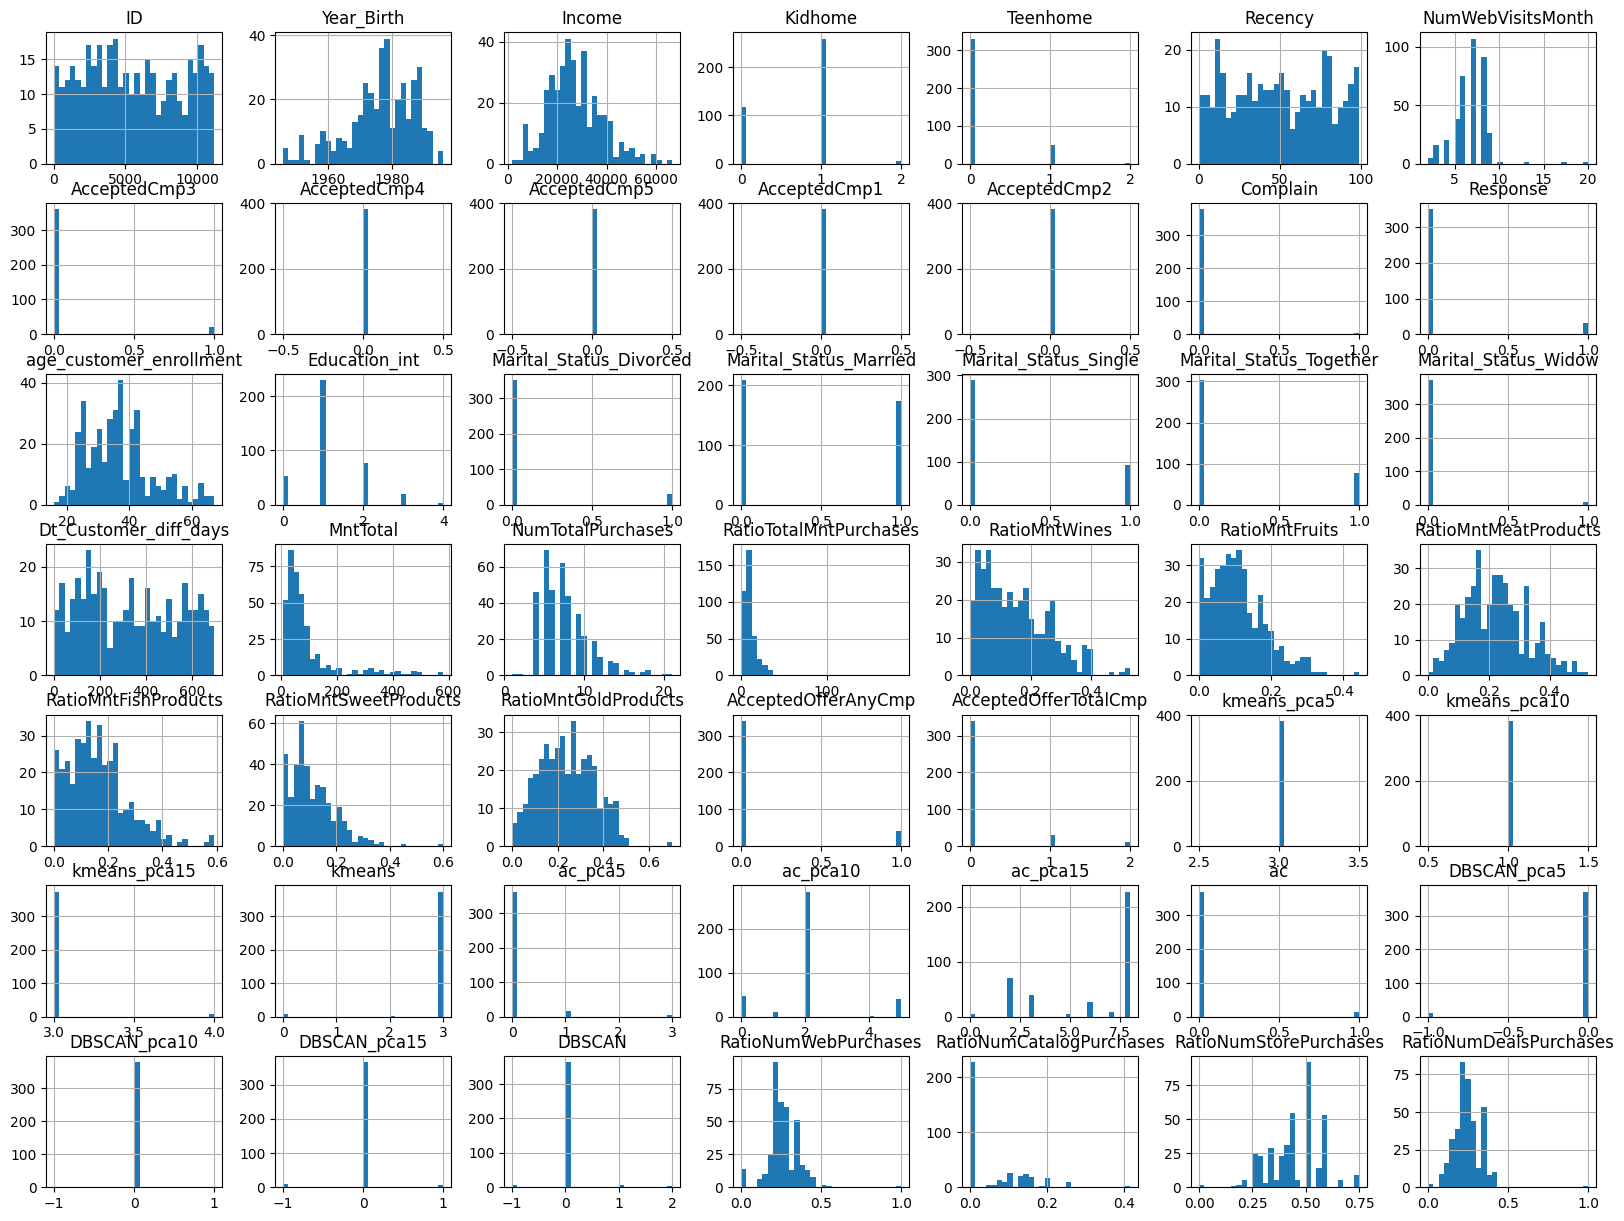

In [292]:
df_marketing_campaign[df_marketing_campaign['kmeans_pca5'] == 3].hist(bins=30, figsize=(20, 15))
plt.show()

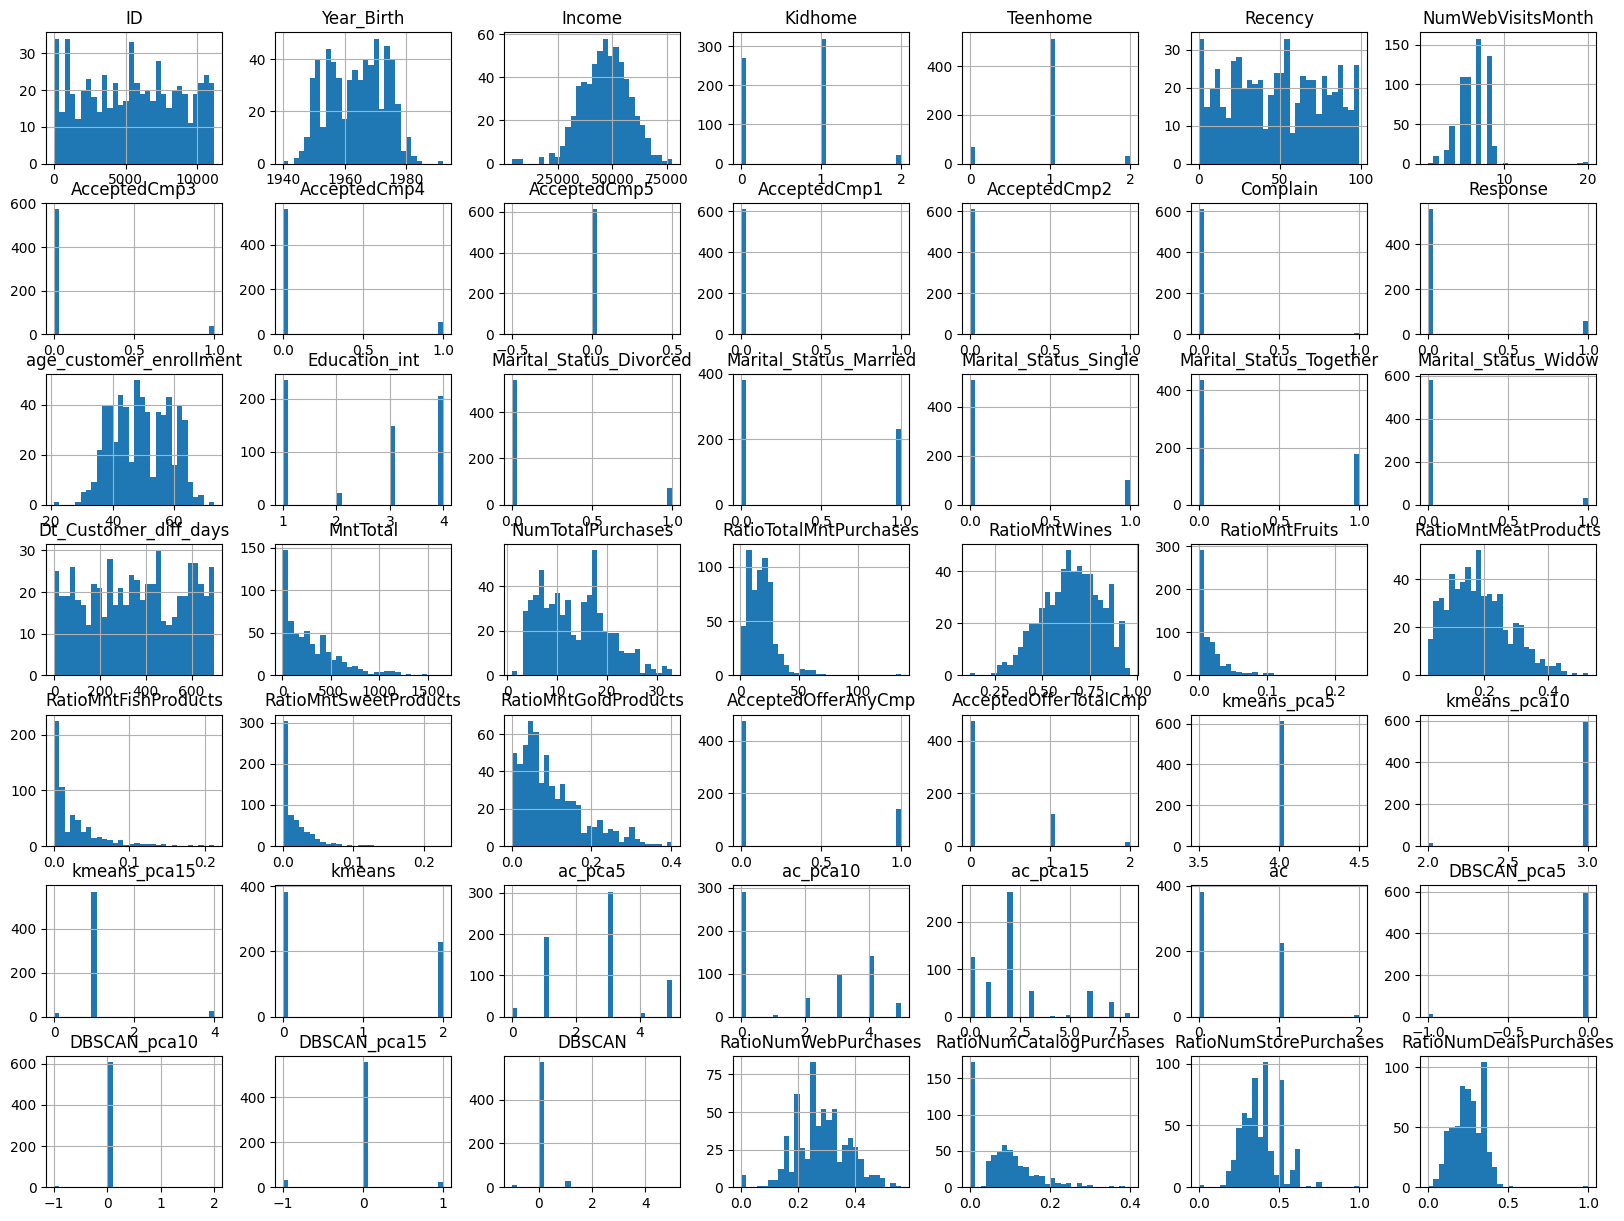

In [293]:
df_marketing_campaign[df_marketing_campaign['kmeans_pca5'] == 4].hist(bins=30, figsize=(20, 15))
plt.show()

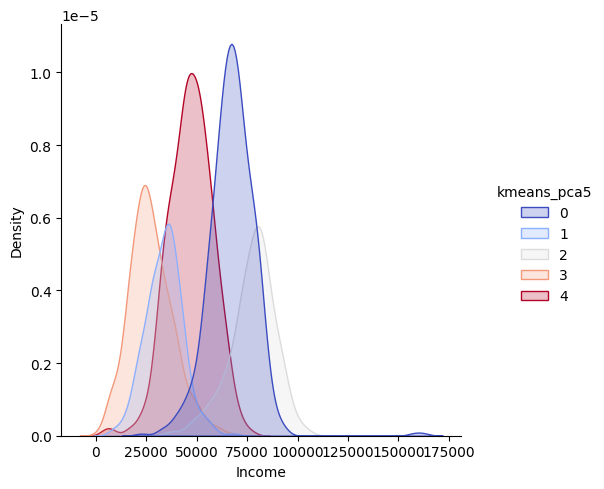

In [298]:
sns.displot(
    df_marketing_campaign[['Income','kmeans_pca5']], 
    x="Income", 
    hue="kmeans_pca5", 
    kind="kde", 
    fill=True,
    palette='coolwarm'
)

In [348]:
5%3

2

/home/tomas/codes/customer_personality_analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/home/tomas/codes/customer_personality_analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/home/tomas/codes/customer_personality_analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/home/tomas/codes/customer_personality_analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wis

ValueError: If using all scalar values, you must pass an index

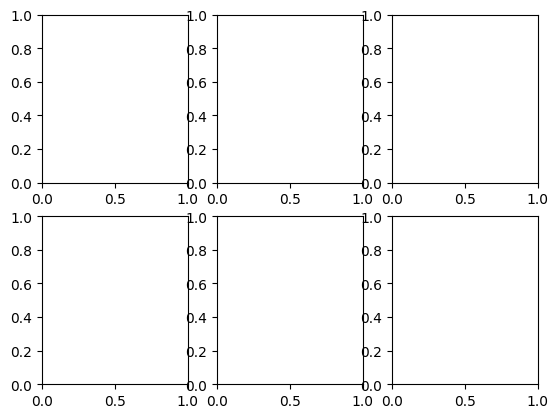

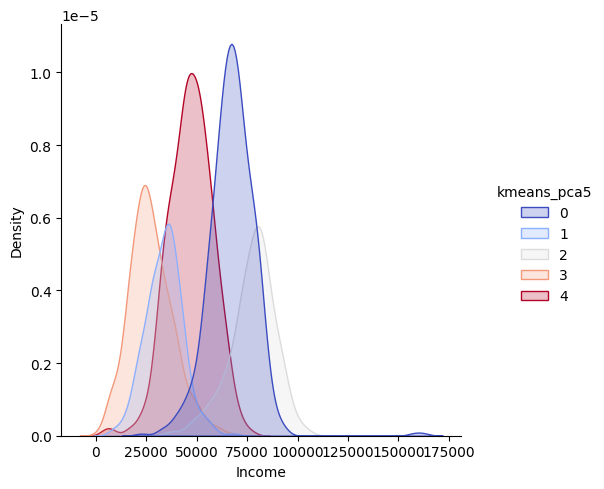

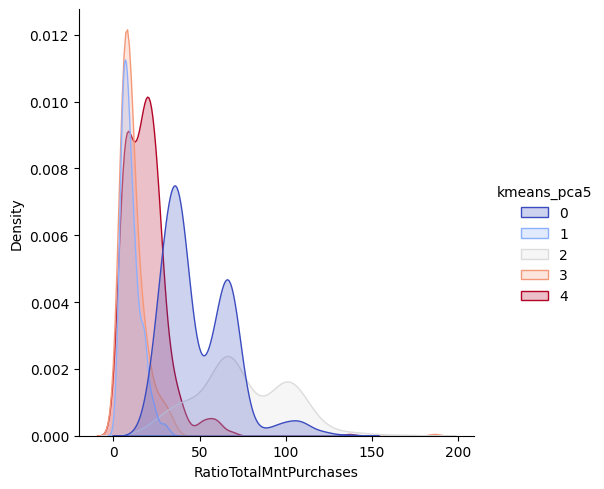

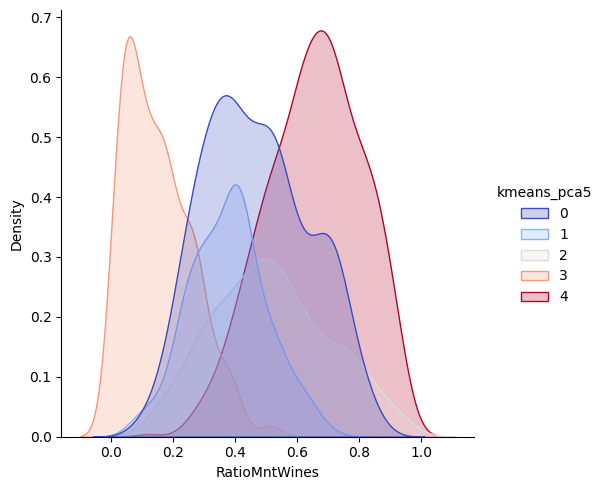

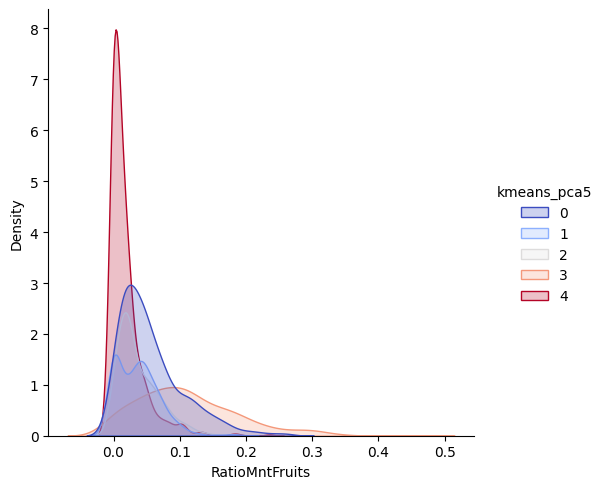

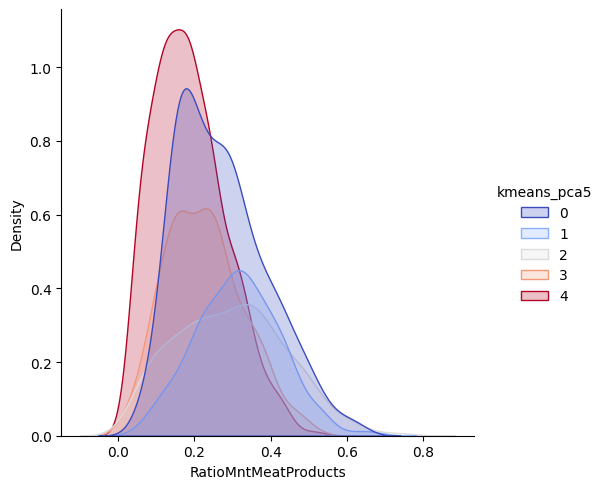

In [355]:
df_aux_displot = df_marketing_campaign[['Income','RatioTotalMntPurchases', 'RatioMntWines', 'RatioMntFruits','RatioMntMeatProducts', 'kmeans_pca5']].copy()
# df_aux_displot = df_marketing_campaign[['Income','RatioTotalMntPurchases', 'RatioMntWines', 'RatioMntFruits',
#        'RatioMntMeatProducts', 'RatioMntFishProducts', 'RatioMntSweetProducts',
#        'RatioMntGoldProducts', 'AcceptedOfferAnyCmp', 'AcceptedOfferTotalCmp',
#        'kmeans_pca5', 'RatioNumWebPurchases',
#        'RatioNumCatalogPurchases', 'RatioNumStorePurchases',
#        'RatioNumDealsPurchases', 'kmeans_pca5']].copy()
# df_aux_displot = df_marketing_campaign[['Income','RatioTotalMntPurchases', 'RatioMntWines', 'RatioMntFruits',
#        'RatioMntMeatProducts', 'RatioMntFishProducts', 'RatioMntSweetProducts',
#        'RatioMntGoldProducts', 'AcceptedOfferAnyCmp', 'AcceptedOfferTotalCmp',
#        'kmeans_pca5', 'RatioNumWebPurchases',
#        'RatioNumCatalogPurchases', 'RatioNumStorePurchases',
#        'RatioNumDealsPurchases', 'kmeans_pca5']]

# df_aux_displot.shape

n_rows=2
n_cols=3
# # Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
# print(fig)
for i, column in enumerate(df_aux_displot.columns):
       sns.displot(
              df_marketing_campaign[[column,'kmeans_pca5']], 
              x=column, 
              hue="kmeans_pca5", 
              kind="kde", 
              fill=True,
              palette='coolwarm',
              ax=axes[i//n_cols,i%n_cols]
       )

In [337]:
df_aux_displot = df_marketing_campaign[['Income','RatioTotalMntPurchases', 'kmeans_pca5']].copy()

In [338]:
df_aux_displot.head()

Income  RatioTotalMntPurchases  kmeans_pca5
0  58138.0               64.680000            2
1  46344.0                4.500000            4
2  71613.0               36.952381            0
3  26646.0                6.625000            3
4  58293.0               22.210526            0

In [339]:
df_aux = df_aux_displot.melt(['kmeans_pca5'], var_name='cols',  value_name='vals')
df_aux

kmeans_pca5                    cols          vals
0               2                  Income  58138.000000
1               4                  Income  46344.000000
2               0                  Income  71613.000000
3               3                  Income  26646.000000
4               0                  Income  58293.000000
...           ...                     ...           ...
4389            0  RatioTotalMntPurchases     74.500000
4390            4  RatioTotalMntPurchases     20.181818
4391            2  RatioTotalMntPurchases     65.315789
4392            0  RatioTotalMntPurchases     36.652174
4393            4  RatioTotalMntPurchases     15.636364

[4394 rows x 3 columns]

In [341]:
# g = sns.FacetGrid(df_aux_displot, col='cols', hue="kmeans_pca5", palette="coolwarm")
g = sns.FacetGrid(df_aux_displot, col='kmeans_pca5', palette="coolwarm")
# g = (g.map(sns.displot, "vals", 
#         kind="kde", 
#         fill=True,
#         palette='coolwarm',
#         #hist=False, rug=True
#         ))

g.map(sns.displot, "vals")

KeyError: 'cols'